# 90Prime data


## Testing for bias drift



In [2]:
import os
import ccdproc
from astropy.io import fits
from astropy.time import Time

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/home/rfinn/github/HalphaImaging/notebooks'

In [11]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/BIAS/RAWDATA/')

In [12]:
!ls

ut20220423.0169.fits  ut20220423.0218.fits  ut20220423.0267.fits
ut20220423.0170.fits  ut20220423.0219.fits  ut20220423.0268.fits
ut20220423.0171.fits  ut20220423.0220.fits  ut20220423.ZERO.0000.fits
ut20220423.0172.fits  ut20220423.0221.fits  ut20220423.ZERO.0001.fits
ut20220423.0173.fits  ut20220423.0222.fits  ut20220423.ZERO.0002.fits
ut20220423.0174.fits  ut20220423.0223.fits  ut20220423.ZERO.0003.fits
ut20220423.0175.fits  ut20220423.0224.fits  ut20220423.ZERO.0004.fits
ut20220423.0176.fits  ut20220423.0225.fits  ut20220423.ZERO.0045.fits
ut20220423.0177.fits  ut20220423.0226.fits  ut20220423.ZERO.0046.fits
ut20220423.0178.fits  ut20220423.0227.fits  ut20220423.ZERO.0047.fits
ut20220423.0179.fits  ut20220423.0228.fits  ut20220423.ZERO.0048.fits
ut20220423.0180.fits  ut20220423.0229.fits  ut20220423.ZERO.0049.fits
ut20220423.0181.fits  ut20220423.0230.fits  ut20220423.ZERO.0050.fits
ut20220423.0182.fits  ut20220423.0231.fits  ut20220423.ZERO.0051.fits
ut20220423.0183.fits  ut202204

In [14]:
ic = ccdproc.ImageFileCollection(os.getcwd(),glob_include="*.fits")

In [17]:
bias = ic.files_filtered(imagetyp = "zero")

In [21]:
t = fits.open(bias[0])

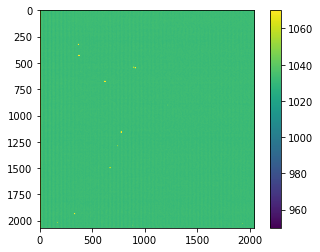

In [38]:
plt.imshow(t[1].data,vmin=950,vmax=1070)
plt.colorbar()

In [41]:
np.median(t[1].data)

1032.0

In [42]:
t[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                   16 / Number of extensions                           
DETSIZE = '[1:8064,1:8192]'    / Detector size                                  
CCDSUM  = '1 1     '           / CCD pixel summing                              
CCDBIN1 =                    1 / Binning factor along axis 1                    
CCDBIN2 =                    1 / Binning factor along axis 2                    
FILENAME= 'TempImage2402.fits' / base filename at acquisition                   
NCCDS   =                    4 / Number of CCDs                                 
NAMPS   =                   16 / Number of amplifiers                           
COMMENT ====================

In [48]:
test_time = t[0].header['TIME-OBS']
test_date = t[0].header['DATE-OBS']
print(test_date+" "+test_time)
newtime = test_date+" "+test_time

2022-04-23 12:27:42.889


In [49]:
mytime = Time(newtime)

In [52]:
mytime.mjd

59692.519246400465

In [ ]:
%run ~/github/HalphaImaging/python3/BOK_bias_stability.py

10


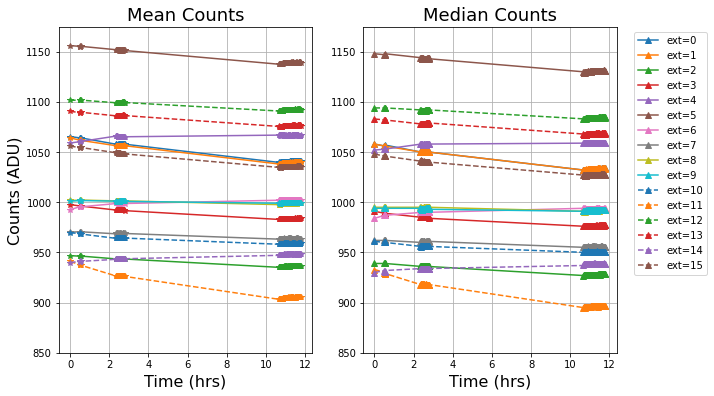

In [120]:
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(len(mycolors))

delta_time = (time - np.min(time)).value*24
# sort data points by time
isorted = np.argsort(delta_time)

plt.figure(figsize=(10,6))


for i in range(nextension):
    if i >= len(mycolors):
        myls='--'
    else:
        myls='-'
    plt.subplot(1,2,1)
    plt.plot(delta_time[isorted],bias_mean[:,i][isorted],label=f"ext={i}",marker='*',ls=myls)
    plt.subplot(1,2,2)
    plt.plot(delta_time[isorted],bias_median[:,i][isorted],label=f"ext={i}",marker='^',ls=myls)

plt.subplot(1,2,1)
plt.title("Mean Counts",fontsize=18)
#plt.legend()
plt.grid()
plt.ylabel("Counts (ADU)",fontsize=16)
plt.ylim(850,1175)
plt.xlabel("Time (hrs)",fontsize=16)

plt.subplot(1,2,2)
plt.legend(bbox_to_anchor=(1.05, 1),ncol=1)
plt.grid()
plt.xlabel("Time (hrs)",fontsize=16)
plt.title("Median Counts",fontsize=18)
plt.ylim(850,1175)
plt.savefig('bias_vs_time.png')

10


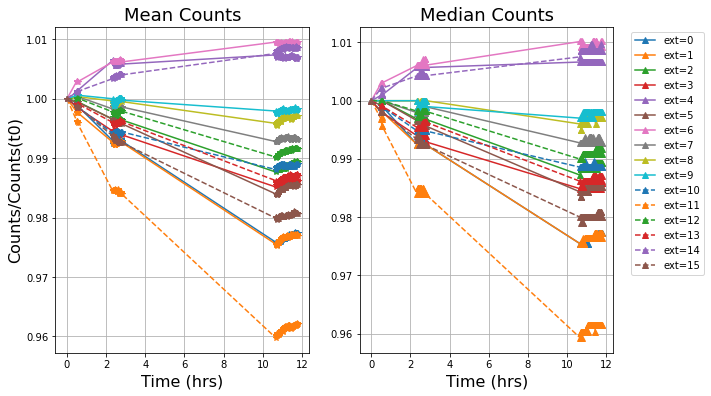

In [118]:
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(len(mycolors))
delta_time = (time - np.min(time)).value*24

# sort data points by time
isorted = np.argsort(delta_time)

plt.figure(figsize=(10,6))


for i in range(nextension):
    if i >= len(mycolors):
        myls='--'
    else:
        myls='-'
    plt.subplot(1,2,1)
    plt.plot(delta_time[isorted],bias_mean[:,i][isorted]/bias_mean[:,i][isorted][0],label=f"ext={i}",marker='*',ls=myls)
    plt.subplot(1,2,2)
    plt.plot(delta_time[isorted],bias_median[:,i][isorted]/bias_median[:,i][isorted][0],label=f"ext={i}",marker='^',ls=myls)

plt.subplot(1,2,1)
plt.title("Mean Counts",fontsize=18)
#plt.legend()
plt.grid()
plt.ylabel("Counts/Counts(t0)",fontsize=16)
#plt.ylim(850,1175)
plt.xlabel("Time (hrs)",fontsize=16)

plt.subplot(1,2,2)
plt.legend(bbox_to_anchor=(1.05, 1),ncol=1)
plt.grid()
plt.xlabel("Time (hrs)",fontsize=16)
plt.title("Median Counts",fontsize=18)
#plt.ylim(850,1175)
plt.savefig('bias_vs_time_normed.png')

Parsing 30 files
0 ut20220425.0060.fits
1 ut20220425.0061.fits
2 ut20220425.0062.fits
3 ut20220425.0063.fits
4 ut20220425.0064.fits
5 ut20220425.0065.fits
6 ut20220425.0066.fits
7 ut20220425.0067.fits
8 ut20220425.0068.fits
9 ut20220425.0069.fits
10 ut20220425.0070.fits
11 ut20220425.0071.fits
12 ut20220425.0072.fits
13 ut20220425.0073.fits
14 ut20220425.0074.fits
15 ut20220425.0075.fits
16 ut20220425.0076.fits
17 ut20220425.0077.fits
18 ut20220425.0078.fits
19 ut20220425.0079.fits
20 ut20220425.0080.fits
21 ut20220425.0081.fits
22 ut20220425.0082.fits
23 ut20220425.0083.fits
24 ut20220425.0084.fits
25 ut20220425.0085.fits
26 ut20220425.0086.fits
27 ut20220425.0087.fits
28 ut20220425.0088.fits
29 ut20220425.0089.fits
10
10


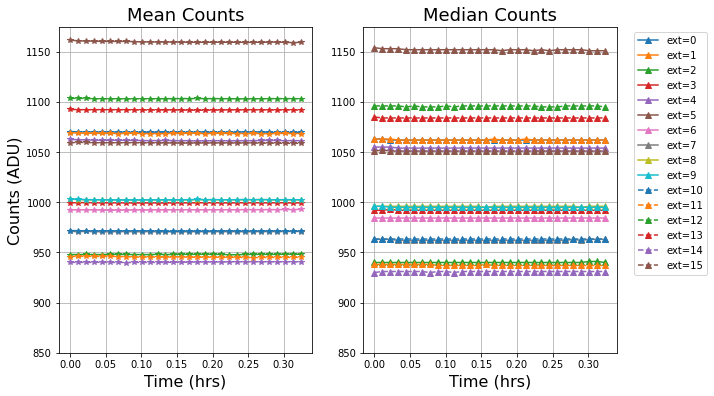

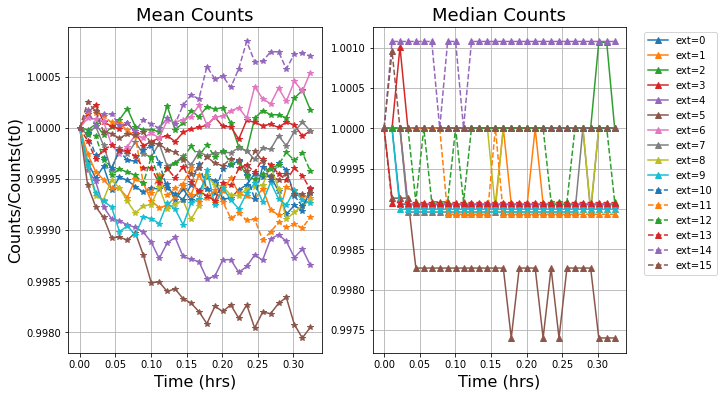

In [122]:
os.chdir("/media/rfinn/hdata/BOK2022Apr/20220425/BIAS")
%run ~/github/HalphaImaging/python3/BOK_bias_stability.py

Parsing 300 files
0 ut20220428.0000.fits
1 ut20220428.0001.fits
2 ut20220428.0002.fits
3 ut20220428.0003.fits
4 ut20220428.0004.fits
5 ut20220428.0005.fits
6 ut20220428.0006.fits
7 ut20220428.0007.fits
8 ut20220428.0008.fits
9 ut20220428.0009.fits
10 ut20220428.0010.fits
11 ut20220428.0011.fits
12 ut20220428.0012.fits
13 ut20220428.0013.fits
14 ut20220428.0014.fits
15 ut20220428.0015.fits
16 ut20220428.0016.fits
17 ut20220428.0017.fits
18 ut20220428.0018.fits
19 ut20220428.0019.fits
20 ut20220428.0020.fits
21 ut20220428.0021.fits
22 ut20220428.0022.fits
23 ut20220428.0023.fits
24 ut20220428.0024.fits
25 ut20220428.0025.fits
26 ut20220428.0026.fits
27 ut20220428.0027.fits
28 ut20220428.0028.fits
29 ut20220428.0029.fits
30 ut20220428.0287.fits
31 ut20220428.0288.fits
32 ut20220428.0289.fits
33 ut20220428.0290.fits
34 ut20220428.0291.fits
35 ut20220428.0292.fits
36 ut20220428.0293.fits
37 ut20220428.0294.fits
38 ut20220428.0295.fits
39 ut20220428.0296.fits
40 ut20220428.0297.fits
41 ut202

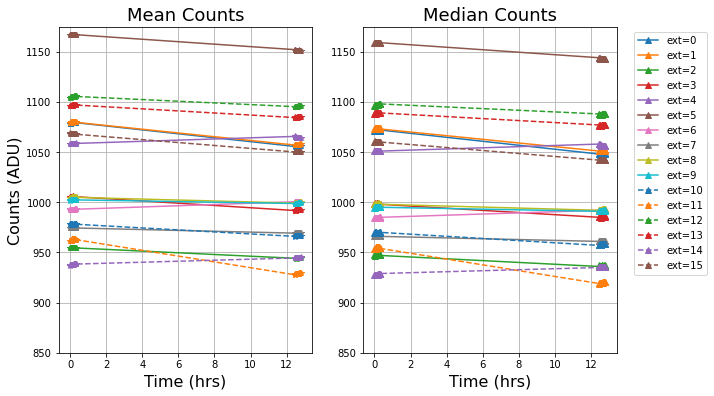

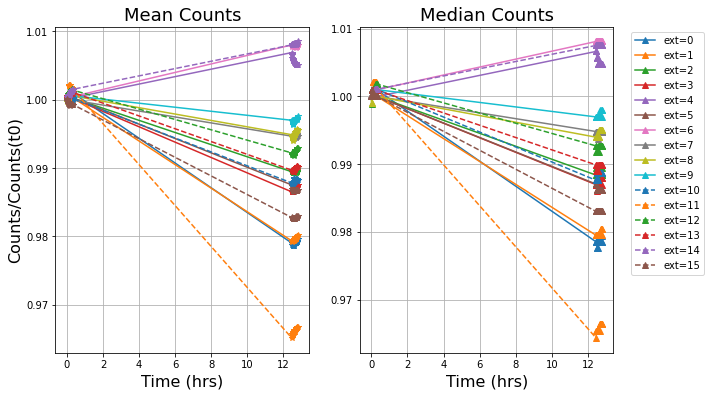

In [123]:
os.chdir("/media/rfinn/hdata/BOK2022Apr/20220428/")
%run ~/github/HalphaImaging/python3/BOK_bias_stability.py

In [144]:
hdu[1].data[100:200,100:200]

array([[1046, 1055, 1039, ..., 1057, 1053, 1044],
       [1053, 1061, 1048, ..., 1053, 1054, 1053],
       [1051, 1044, 1052, ..., 1046, 1055, 1047],
       ...,
       [1042, 1053, 1039, ..., 1056, 1050, 1051],
       [1056, 1058, 1052, ..., 1043, 1044, 1048],
       [1043, 1048, 1040, ..., 1050, 1055, 1056]], dtype=uint16)

In [346]:
hdu[0].shape

(2046, 2014)

## Measuring Gain

$$ \sigma = \sqrt{N_e} $$

$$ \sigma = \sqrt{gain \times N_{ADU}} $$


$$ \sigma^2 = {gain \times N_{ADU}} $$

Make a plot of $\sigma^2$ vs $N_{ADU}$.  The slope is the gain.

In [351]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/FLAT-r')
%time %run ~/github/HalphaImaging/python3/BOK_measure_gain.py

Parsing 320 files
processing extensions from 90Prime.r.2022-04-23T03:30:23.492
ext10: size of ccd is 2046x2014
ext11: size of ccd is 2046x2014
ext12: size of ccd is 2046x2014
ext13: size of ccd is 2046x2014
ext14: size of ccd is 2046x2014
ext15: size of ccd is 2046x2014
ext16: size of ccd is 2046x2014
ext1: size of ccd is 2046x2014
ext2: size of ccd is 2046x2014
ext3: size of ccd is 2046x2014
ext4: size of ccd is 2046x2014
ext5: size of ccd is 2046x2014
ext6: size of ccd is 2046x2014
ext7: size of ccd is 2046x2014
ext8: size of ccd is 2046x2014
ext9: size of ccd is 2046x2014
processing extensions from 90Prime.r.2022-04-23T03:31:08.584
processing extensions from 90Prime.r.2022-04-23T03:31:53.561
processing extensions from 90Prime.r.2022-04-23T03:32:38.527
processing extensions from 90Prime.r.2022-04-23T03:33:23.620
processing extensions from 90Prime.r.2022-04-23T03:34:08.548
processing extensions from 90Prime.r.2022-04-23T03:34:53.581
processing extensions from 90Prime.r.2022-04-23T03:3

<Figure size 432x288 with 0 Axes>

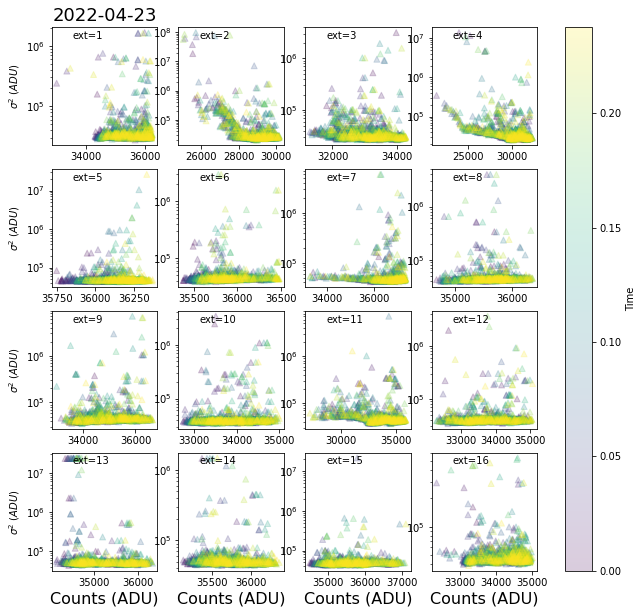

In [342]:
plot_gain(fmedian,fstd,delta_time,title="2022-04-23")

got here. now making hists...


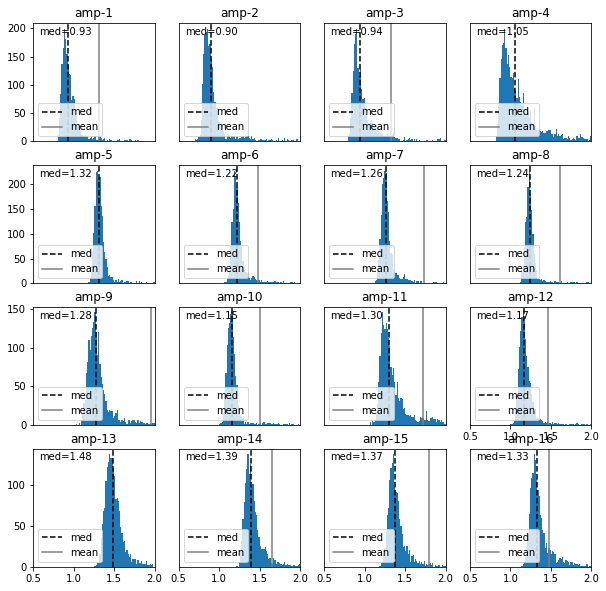

In [343]:
plot_gain_hists(fmedian,fstd,delta_time,title="2022-04-23 Halpha")

In [285]:
!gethead GAINCORR *_?.fits

FLAT-r_1.fits 9.596297E-01
FLAT-r_2.fits 7.921672E-01
FLAT-r_3.fits 8.966700E-01
FLAT-r_4.fits 8.348300E-01
FLAT-r_5.fits 9.764166E-01
FLAT-r_6.fits 9.683520E-01
FLAT-r_7.fits 1.000000
FLAT-r_8.fits 9.637906E-01
FLAT-r_9.fits 9.505100E-01


### Testing on combined flat images - DOES NOT WORK

On 2022-04-23, we have 20 r-band flats.

$$ \sigma = \sqrt{N_e} $$

$$ \sigma = \sqrt{gain \times N_{ADU}} $$


$$ \sigma^2 = \sum_0^i {gain \times N_{ADU}} = i \times  {gain \times N_{ADU}}$$

Make a plot of $\sigma^2$ vs $N_{ADU}$.  The slope is the $i \times gain = 20 \times gain$.

Images are also normalized, so this probably won't work right.

Moving on...

In [294]:
%time %run ~/github/HalphaImaging/python3/BOK_measure_gain.py --comb --ncomb 20

Parsing 16 files
processing extensions from FLAT-r
10
CPU times: user 572 ms, sys: 16 ms, total: 588 ms
Wall time: 586 ms


<Figure size 432x288 with 0 Axes>

In [ ]:
plot_gain(fmedian,fstd,delta_time,title="2022-04-23")

In [ ]:
plot_gain_hists(fmedian,fstd,delta_time,title="2022-04-23")

In [310]:
r = fstd**2/fmedian
for i in range(len(r[0])):
    print(f"mean gain = {np.mean(r[0][i]):.2e}")

mean gain = 1.01e-05
mean gain = 1.32e-03
mean gain = 1.45e-05
mean gain = 5.05e-05
mean gain = 2.87e-05
mean gain = 2.53e-05
mean gain = 2.85e-05
mean gain = 2.71e-05
mean gain = 2.31e-05
mean gain = 2.44e-05
mean gain = 2.62e-05
mean gain = 2.24e-05
mean gain = 2.54e-04
mean gain = 3.07e-05
mean gain = 2.63e-05
mean gain = 2.59e-05


In [303]:
len(r[0])

16

## Checking another day

But first need to run BIAS and FLAT corrections on all days!!!


In [311]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/FLAT-Ha4nm')

In [338]:
%time %run ~/github/HalphaImaging/python3/BOK_measure_gain.py 

Parsing 320 files
processing extensions from 90Prime.Ha4nm.2022-04-23T03:00:29.665
processing extensions from 90Prime.Ha4nm.2022-04-23T03:01:51.098
processing extensions from 90Prime.Ha4nm.2022-04-23T03:03:12.673
processing extensions from 90Prime.Ha4nm.2022-04-23T03:04:34.192
processing extensions from 90Prime.Ha4nm.2022-04-23T03:05:55.801
processing extensions from 90Prime.Ha4nm.2022-04-23T03:07:17.307
processing extensions from 90Prime.Ha4nm.2022-04-23T03:08:38.878
processing extensions from 90Prime.Ha4nm.2022-04-23T03:10:00.385
processing extensions from 90Prime.Ha4nm.2022-04-23T03:11:21.751
processing extensions from 90Prime.Ha4nm.2022-04-23T03:12:43.312
processing extensions from 90Prime.Ha4nm.2022-04-23T03:14:04.864
processing extensions from 90Prime.Ha4nm.2022-04-23T03:15:26.279
processing extensions from 90Prime.Ha4nm.2022-04-23T03:16:47.786
processing extensions from 90Prime.Ha4nm.2022-04-23T03:18:09.395
processing extensions from 90Prime.Ha4nm.2022-04-23T03:19:31.095
process

<Figure size 432x288 with 0 Axes>

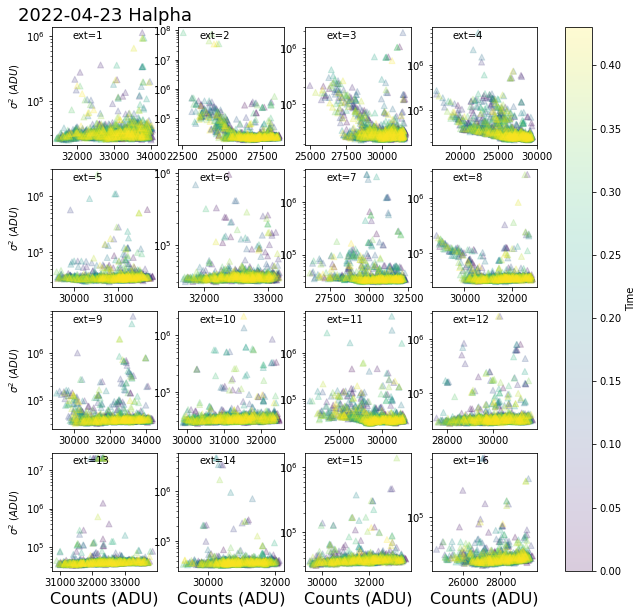

In [339]:
plot_gain(fmedian,fstd,delta_time,title="2022-04-23 Halpha")

got here. now making hists...


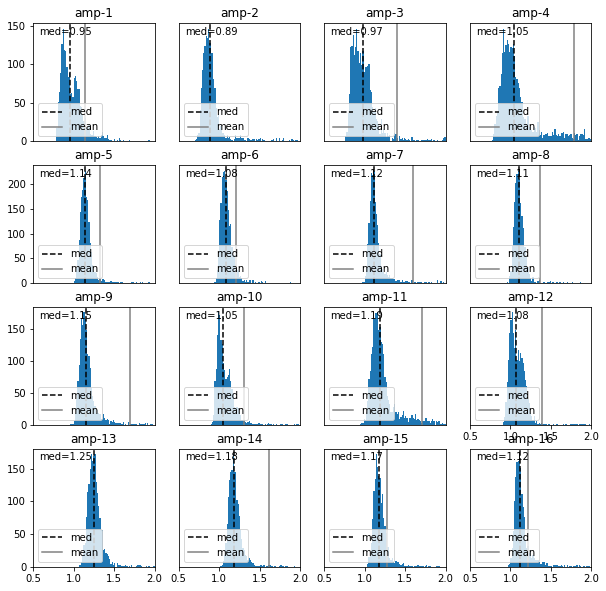

In [340]:
plot_gain_hists(fmedian,fstd,delta_time,title="2022-04-23 Halpha")

In [ ]:
allgains = []
allax = []    
for i in range(nextension):
    allgains.append([std[:,i,:].flatten()**2/counts[:,i,:].flatten()])  

In [319]:
g = fstd**2/fmedian

In [322]:
allgains = []
for i in range(16):
    allgains.append(g[:,i,:].flatten())

In [323]:
len(allgains)

16

In [347]:
pwd

'/media/rfinn/hdata/BOK2022Apr/20220423/FLAT-r'

In [349]:
xmax

2046

In [350]:
ymax

2014

# Normalizing amplifiers

ugh

In [2]:
from astropy.io import fits
from astropy.time import Time
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/norm_amp_test')

In [2]:
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py

In [4]:
%time t = main(matchstring="*PA.fits")

ZP = 29.655 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_10PA.fits
ZP = 29.682 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_2PA.fits
ZP = 29.674 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_1PA.fits
ZP = 29.601 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_14PA.fits
ZP = 29.678 +/- 0.001, 90Prime.r.2022-04-23T10:19:51.211_12PA.fits
ZP = 29.603 +/- 0.001, 90Prime.r.2022-04-23T10:19:51.211_5PA.fits
ZP = 29.667 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_15PA.fits
ZP = 29.621 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_13PA.fits
ZP = 29.579 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_16PA.fits
ZP = 29.671 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_3PA.fits
ZP = 29.732 +/- 0.005, 90Prime.r.2022-04-23T10:19:51.211_11PA.fits
ZP = 29.719 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_4PA.fits
ZP = 29.672 +/- 0.003, 90Prime.r.2022-04-23T10:22:12.645_10PA.fits
ZP = 29.615 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_7PA.fits
ZP = 29.626 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_6PA.fits
ZP

In [17]:
print(t[0][0])
print(t[0][0][10:33])
print(t[0][0].split('_')[1].split('PA')[0])

getzpoutput = t

90Prime.r.2022-04-23T10:19:51.211_10PA.fits
2022-04-23T10:19:51.211
10


In [11]:
def process_output(output):
    filename = []
    obstime = []
    amp = []
    zp = []
    zperr = []
    prefix = []
    for t in output:
        # splice image name to get info
        filename.append(t[0])
        obstime.append(t[0][10:33])
        amp.append(int(t[0].split('_')[1].split('PA')[0]))
        prefix.append(t[0].split('_')[0])
        zp.append(t[1])
        zperr.append(t[2])
    ufiles = set(prefix)
    print(len(ufiles))
    zp = np.array(zp)
    zperr = np.array(zperr)
    amp = np.array(amp)

    scaled_zp = np.ones(len(zp))
    for p in ufiles:
        print(p)
        flag = np.zeros(len(prefix),'bool')
        for i in range(len(prefix)):
            flag[i] = prefix[i] == p

        avezp = np.mean(zp[flag])
        scaled_zp[flag] = zp[flag]/avezp
        print(np.sum(flag),avezp)
    return filename,obstime,amp,zp,zperr,prefix,scaled_zp

In [12]:
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(getzpoutput)

NameError: name 'getzpoutput' is not defined

In [13]:
def make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp):
    time = Time(obstime)


    mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    print(len(mycolors))

    delta_time = (time - np.min(time)).value*24

    plt.figure(figsize=(8,6))
    plt.scatter(amp,zp,c=delta_time,alpha=.9,s=20)
    plt.colorbar(label='Time (hr)')
    plt.xlabel('Amplifier',fontsize=16)
    plt.ylabel('ZP (AB)',fontsize=16)
    junk = plt.xticks(np.arange(1,17,2))
    
    plt.figure(figsize=(8,6))
    plt.scatter(amp,scaled_zp,c=delta_time,alpha=.9,s=20)
    plt.colorbar(label='Time (hr)')
    plt.xlabel('Amplifier',fontsize=16)
    plt.ylabel('ZP (AB)',fontsize=16)
    junk = plt.xticks(np.arange(1,17,2))
    plt.grid()
    
    chips = set(amp)
    for c in chips:
        flag = amp == c
        print(f"med/ave offset for chip{c:02d} = {np.median(scaled_zp[flag]):.4f},{np.mean(scaled_zp[flag]):.4f}")

10
med/ave offset for chip01 = 0.9999,1.0001
med/ave offset for chip02 = 1.0013,1.0012
med/ave offset for chip03 = 1.0005,1.0005
med/ave offset for chip04 = 1.0021,1.0021
med/ave offset for chip05 = 0.9983,0.9983
med/ave offset for chip06 = 0.9989,0.9989
med/ave offset for chip07 = 0.9987,0.9987
med/ave offset for chip08 = 1.0002,1.0001
med/ave offset for chip09 = 1.0016,1.0015
med/ave offset for chip10 = 1.0002,1.0002
med/ave offset for chip11 = 1.0028,1.0028
med/ave offset for chip12 = 1.0008,1.0007
med/ave offset for chip13 = 0.9989,0.9989
med/ave offset for chip14 = 0.9982,0.9982
med/ave offset for chip15 = 1.0001,1.0002
med/ave offset for chip16 = 0.9976,0.9976


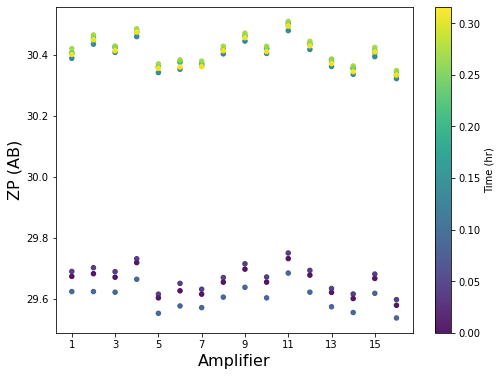

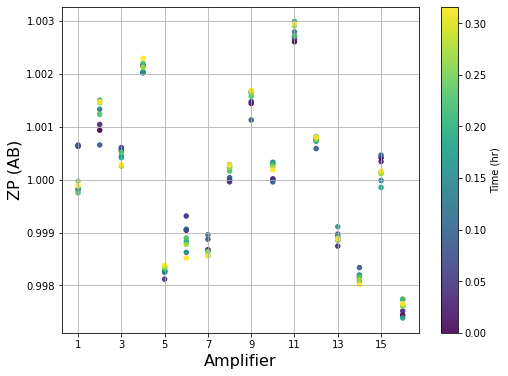

In [91]:
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

## Testing on target 0 from 2022-04-23

In [8]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r_1')
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py

<Figure size 432x288 with 0 Axes>

In [5]:
%time tr1_output = main(matchstring="*PA.fits",verbose=False)

ZP = 29.685 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_12PA.fits
ZP = 29.655 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_10PA.fits
ZP = 29.669 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_15PA.fits
ZP = 29.674 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_1PA.fits
ZP = 29.608 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_5PA.fits
ZP = 29.601 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_14PA.fits
ZP = 29.583 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_16PA.fits
ZP = 29.723 +/- 0.005, 90Prime.r.2022-04-23T10:19:51.211_4PA.fits
ZP = 29.686 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_2PA.fits
ZP = 29.620 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_13PA.fits
ZP = 29.673 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_3PA.fits
ZP = 29.736 +/- 0.005, 90Prime.r.2022-04-23T10:19:51.211_11PA.fits
ZP = 29.672 +/- 0.003, 90Prime.r.2022-04-23T10:22:12.645_10PA.fits
ZP = 29.624 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_6PA.fits
ZP = 29.614 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_7PA.fits
ZP

8
90Prime.r.2022-04-23T10:19:51.211
16 29.656818412111093
90Prime.r.2022-04-23T10:36:03.346
16 30.42138302663175
90Prime.r.2022-04-23T10:38:48.076
16 30.405993386417787
90Prime.r.2022-04-23T10:30:33.998
16 30.413772869006714
90Prime.r.2022-04-23T10:25:02.501
16 29.60641587481269
90Prime.r.2022-04-23T10:33:18.622
16 30.41302920887476
90Prime.r.2022-04-23T10:27:49.541
16 30.39474319805538
90Prime.r.2022-04-23T10:22:12.645
16 29.67185452939781
10
med/ave offset for chip01 = 0.9999,1.0001
med/ave offset for chip02 = 1.0014,1.0013
med/ave offset for chip03 = 1.0006,1.0006
med/ave offset for chip04 = 1.0020,1.0021
med/ave offset for chip05 = 0.9983,0.9983
med/ave offset for chip06 = 0.9986,0.9986
med/ave offset for chip07 = 0.9985,0.9986
med/ave offset for chip08 = 1.0003,1.0003
med/ave offset for chip09 = 1.0015,1.0015
med/ave offset for chip10 = 1.0002,1.0001
med/ave offset for chip11 = 1.0027,1.0028
med/ave offset for chip12 = 1.0009,1.0009
med/ave offset for chip13 = 0.9989,0.9989
med/av

<Figure size 432x288 with 0 Axes>

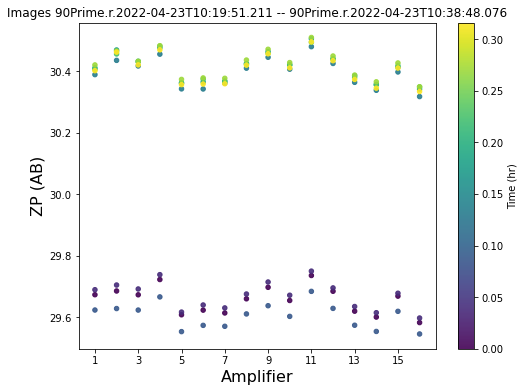

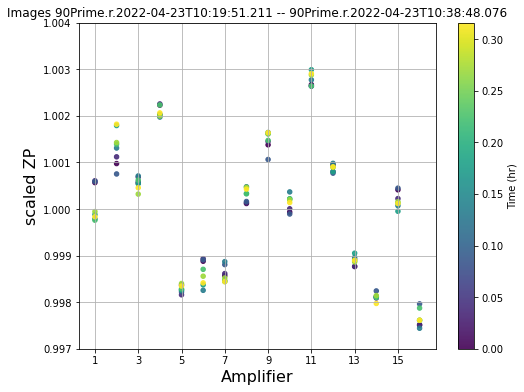

In [13]:
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tr1_output)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

In [10]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r_0')
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py


In [11]:
%time tr0_output = main(matchstring="*PA.fits",verbose=False)

ZP = 30.474 +/- 0.006, 90Prime.r.2022-04-23T07:54:51.897_11PA.fits
ZP = 30.360 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_5PA.fits
ZP = 30.421 +/- 0.005, 90Prime.r.2022-04-23T07:54:51.897_15PA.fits
ZP = 30.354 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_14PA.fits
ZP = 30.422 +/- 0.004, 90Prime.r.2022-04-23T07:54:51.897_1PA.fits
ZP = 30.494 +/- 0.009, 90Prime.r.2022-04-23T07:54:51.897_4PA.fits
ZP = 30.436 +/- 0.005, 90Prime.r.2022-04-23T07:54:51.897_3PA.fits
ZP = 30.353 +/- 0.003, 90Prime.r.2022-04-23T07:54:51.897_16PA.fits
ZP = 30.443 +/- 0.008, 90Prime.r.2022-04-23T07:54:51.897_2PA.fits
ZP = 30.382 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_13PA.fits
ZP = 30.373 +/- 0.003, 90Prime.r.2022-04-23T07:54:51.897_7PA.fits
ZP = 30.421 +/- 0.004, 90Prime.r.2022-04-23T07:54:51.897_8PA.fits
ZP = 30.385 +/- 0.003, 90Prime.r.2022-04-23T07:54:51.897_6PA.fits
ZP = 30.468 +/- 0.007, 90Prime.r.2022-04-23T07:57:36.625_11PA.fits
ZP = 30.470 +/- 0.008, 90Prime.r.2022-04-23T07:54:51.897_9PA.fits
ZP =

10
90Prime.r.2022-04-23T08:18:41.282
16 30.423112482259985
90Prime.r.2022-04-23T08:10:27.516
16 30.41123316911068
90Prime.r.2022-04-23T08:03:06.088
16 30.42828659486591
90Prime.r.2022-04-23T07:54:51.897
16 30.41470013398243
90Prime.r.2022-04-23T08:15:56.515
16 30.426033677835612
90Prime.r.2022-04-23T08:21:25.953
16 30.401316636590874
90Prime.r.2022-04-23T08:05:51.243
16 30.419874602069108
90Prime.r.2022-04-23T08:00:21.342
16 30.419901746189474
90Prime.r.2022-04-23T07:57:36.625
16 30.41087746709912
90Prime.r.2022-04-23T08:13:11.779
16 30.401711686565342
10
med/ave offset for chip01 = 1.0002,1.0002
med/ave offset for chip02 = 1.0010,1.0011
med/ave offset for chip03 = 1.0007,1.0007
med/ave offset for chip04 = 1.0025,1.0025
med/ave offset for chip05 = 0.9982,0.9982
med/ave offset for chip06 = 0.9990,0.9990
med/ave offset for chip07 = 0.9987,0.9987
med/ave offset for chip08 = 1.0002,1.0002
med/ave offset for chip09 = 1.0016,1.0015
med/ave offset for chip10 = 1.0003,1.0003
med/ave offset for

<Figure size 432x288 with 0 Axes>

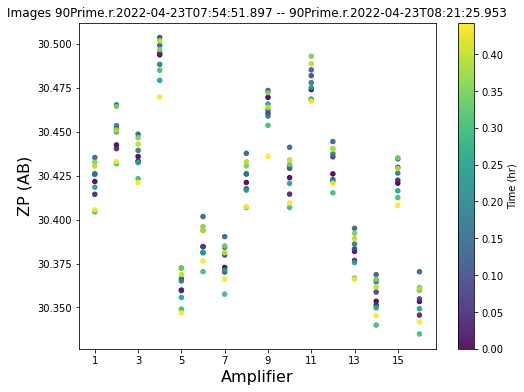

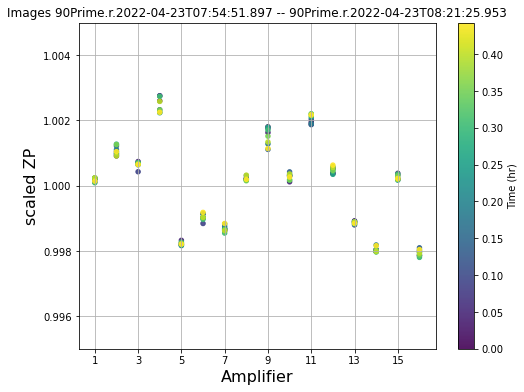

In [25]:
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tr0_output)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

## Testing on an Halph Image



In [15]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-Ha4nm_0')
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py

<Figure size 432x288 with 0 Axes>

In [16]:
%time tha0_output = main(matchstring="*PA.fits",verbose=False)

ZP = 27.808 +/- 0.021, 90Prime.Ha4nm.2022-04-23T08:47:07.896_1PA.fits
ZP = 27.797 +/- 0.025, 90Prime.Ha4nm.2022-04-23T08:47:07.896_13PA.fits
ZP = 27.854 +/- 0.016, 90Prime.Ha4nm.2022-04-23T08:47:07.896_2PA.fits
ZP = 27.878 +/- 0.015, 90Prime.Ha4nm.2022-04-23T08:47:07.896_12PA.fits
ZP = 27.887 +/- 0.025, 90Prime.Ha4nm.2022-04-23T08:47:07.896_3PA.fits
ZP = 27.869 +/- 0.009, 90Prime.Ha4nm.2022-04-23T08:47:07.896_16PA.fits
ZP = 27.800 +/- 0.008, 90Prime.Ha4nm.2022-04-23T08:47:07.896_14PA.fits
ZP = 27.788 +/- 0.009, 90Prime.Ha4nm.2022-04-23T08:47:07.896_5PA.fits
ZP = 27.930 +/- 0.010, 90Prime.Ha4nm.2022-04-23T08:47:07.896_4PA.fits
ZP = 27.941 +/- 0.023, 90Prime.Ha4nm.2022-04-23T08:47:07.896_11PA.fits
ZP = 27.833 +/- 0.008, 90Prime.Ha4nm.2022-04-23T08:47:07.896_15PA.fits
ZP = 27.793 +/- 0.007, 90Prime.Ha4nm.2022-04-23T08:47:07.896_10PA.fits
ZP = 27.879 +/- 0.018, 90Prime.Ha4nm.2022-04-23T08:47:07.896_7PA.fits
ZP = 27.796 +/- 0.009, 90Prime.Ha4nm.2022-04-23T08:47:07.896_6PA.fits
ZP = 27.849 +

In [20]:
tha0_output[0][0][14:37]

'2022-04-23T08:47:07.896'

10
90Prime.Ha4nm.2022-04-23T09:05:50.686
16 27.851331908431117
90Prime.Ha4nm.2022-04-23T09:13:19.908
16 27.866925774039398
90Prime.Ha4nm.2022-04-23T09:17:04.648
16 27.86752110237248
90Prime.Ha4nm.2022-04-23T08:47:07.896
16 27.8468878839088
90Prime.Ha4nm.2022-04-23T08:58:21.557
16 27.851390576893664
90Prime.Ha4nm.2022-04-23T08:50:52.652
16 27.857489023931343
90Prime.Ha4nm.2022-04-23T09:02:06.325
16 27.854549465661773
90Prime.Ha4nm.2022-04-23T09:09:35.057
16 27.8597820225481
90Prime.Ha4nm.2022-04-23T08:54:37.261
16 27.84799616707096
90Prime.Ha4nm.2022-04-23T09:20:49.076
16 27.860732470605587
10
med/ave offset for chip01 = 0.9982,0.9982
med/ave offset for chip02 = 1.0001,1.0001
med/ave offset for chip03 = 1.0011,1.0010
med/ave offset for chip04 = 1.0030,1.0032
med/ave offset for chip05 = 0.9977,0.9976
med/ave offset for chip06 = 0.9980,0.9979
med/ave offset for chip07 = 1.0007,1.0008
med/ave offset for chip08 = 1.0000,1.0000
med/ave offset for chip09 = 1.0010,1.0007
med/ave offset for chi

<Figure size 432x288 with 0 Axes>

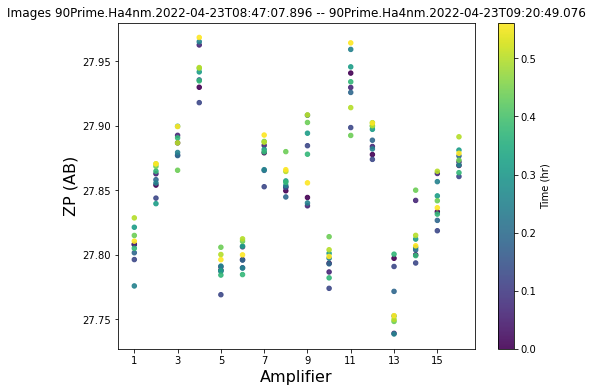

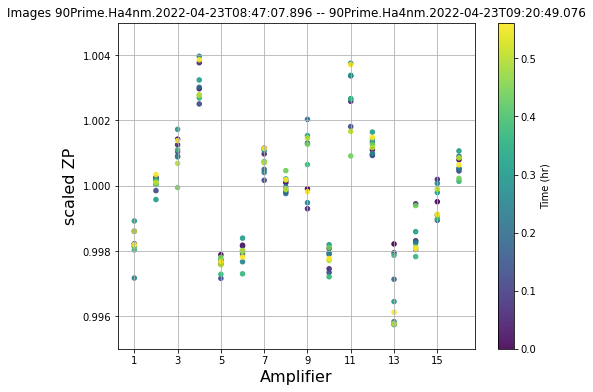

In [26]:
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tha0_output)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

# Measuring the sky

Implementing Dennis's idea to check the sky levels and see how the pattern compares with the ZP offsets

In [32]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r_1')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py

<Figure size 432x288 with 0 Axes>

In [26]:
%time tr1_output_sky = mainsky(matchstring="*PA.fits",verbose=False)

CPU times: user 553 ms, sys: 123 ms, total: 676 ms
Wall time: 1min 28s


8
90Prime.r.2022-04-23T10:30:33.998
16 1907.1819
90Prime.r.2022-04-23T10:27:49.541
16 1924.7563
90Prime.r.2022-04-23T10:36:03.346
16 1927.9836
90Prime.r.2022-04-23T10:22:12.645
16 925.401
90Prime.r.2022-04-23T10:33:18.622
16 1917.4753
90Prime.r.2022-04-23T10:25:02.501
16 1025.5984
90Prime.r.2022-04-23T10:38:48.076
16 1978.9573
90Prime.r.2022-04-23T10:19:51.211
16 936.1977
10
med/ave offset for chip01 = 15.3871,14.7837
med/ave offset for chip02 = 3.5451,4.5463
med/ave offset for chip03 = 12.9506,13.2533
med/ave offset for chip04 = 56.7494,50.7789
med/ave offset for chip05 = -138.0522,-113.1294
med/ave offset for chip06 = -24.4528,-19.7959
med/ave offset for chip07 = -108.8652,-89.2752
med/ave offset for chip08 = -22.8768,-19.1123
med/ave offset for chip09 = 56.8358,47.1545
med/ave offset for chip10 = -2.4650,-2.4837
med/ave offset for chip11 = 106.7368,86.7196
med/ave offset for chip12 = 5.8089,5.4581
med/ave offset for chip13 = -68.7458,-57.3907
med/ave offset for chip14 = -98.4301,-81

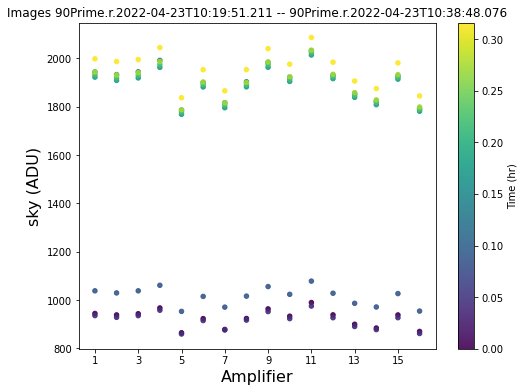

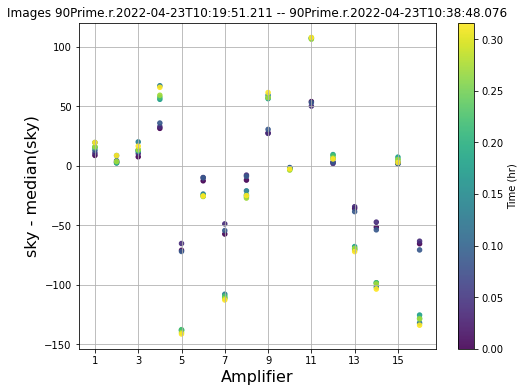

In [33]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tr1_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

### Trying for target 2, which has all same expt and fewer bright stars

In [34]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r_2')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time tr2_output_sky = mainsky(matchstring="*PA.fits",verbose=False)

CPU times: user 409 ms, sys: 90.1 ms, total: 499 ms
Wall time: 1min 5s


<Figure size 432x288 with 0 Axes>

In [ ]:
tr2_output_sky


In [40]:
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py

<Figure size 432x288 with 0 Axes>

In [41]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tr2_output_sky)


6
90Prime.r.2022-04-23T11:10:46.143
16 2089.2656
90Prime.r.2022-04-23T11:13:30.813
16 2056.7417
90Prime.r.2022-04-23T10:43:35.652
16 1884.7654
90Prime.r.2022-04-23T11:08:01.496
16 2013.6096
90Prime.r.2022-04-23T11:05:16.713
16 1892.1052
90Prime.r.2022-04-23T12:06:03.279
16 30781.637


10
med/ave offset for chip01 = 0.0132,0.0133
med/ave offset for chip02 = 0.0084,0.0085
med/ave offset for chip03 = 0.0053,0.0052
med/ave offset for chip04 = 0.0349,0.0346
med/ave offset for chip05 = -0.0687,-0.0691
med/ave offset for chip06 = -0.0098,-0.0100
med/ave offset for chip07 = -0.0545,-0.0548
med/ave offset for chip08 = -0.0174,-0.0176
med/ave offset for chip09 = 0.0305,0.0306
med/ave offset for chip10 = -0.0006,-0.0007
med/ave offset for chip11 = 0.0491,0.0494
med/ave offset for chip12 = 0.0020,0.0021
med/ave offset for chip13 = -0.0350,-0.0348
med/ave offset for chip14 = -0.0517,-0.0519
med/ave offset for chip15 = 0.0006,0.0007
med/ave offset for chip16 = -0.0679,-0.0679


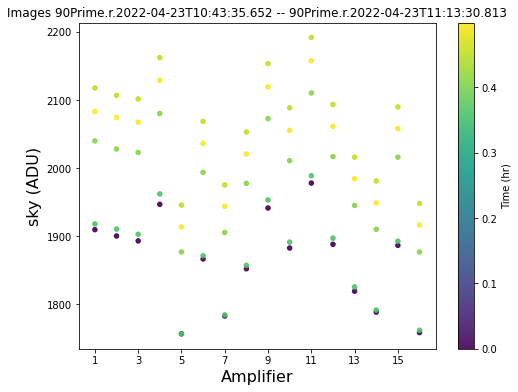

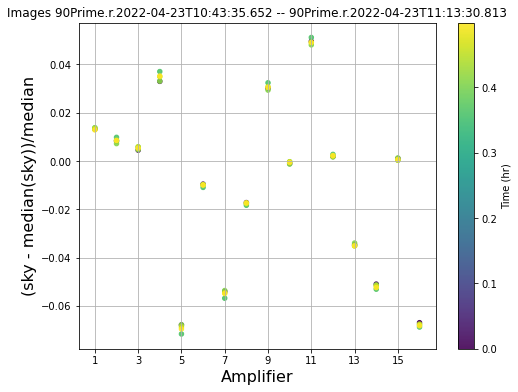

In [42]:
make_plots(filename[:-16],obstime[:-16],amp[:-16],zp[:-16],zperr[:-16],prefix[:-16],scaled_zp[:-16])

### target 0, r-band

In [45]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r_0')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time tr0_output_sky = mainsky(matchstring="*PA.fits",verbose=False)

CPU times: user 781 ms, sys: 68.5 ms, total: 849 ms
Wall time: 1min 53s


<Figure size 432x288 with 0 Axes>

10
90Prime.r.2022-04-23T08:21:25.953
16 1261.4094
90Prime.r.2022-04-23T08:05:51.243
16 1257.0396
90Prime.r.2022-04-23T08:10:27.516
16 1244.1775
90Prime.r.2022-04-23T08:13:11.779
16 1262.6901
90Prime.r.2022-04-23T08:15:56.515
16 1229.1274
90Prime.r.2022-04-23T07:54:51.897
16 1262.8843
90Prime.r.2022-04-23T08:00:21.342
16 1281.2006
90Prime.r.2022-04-23T08:18:41.282
16 1235.2554
90Prime.r.2022-04-23T08:03:06.088
16 1253.8234
90Prime.r.2022-04-23T07:57:36.625
16 1280.8433
10
med/ave offset for chip01 = 0.0149,0.0145
med/ave offset for chip02 = 0.0133,0.0133
med/ave offset for chip03 = -0.0006,-0.0004
med/ave offset for chip04 = 0.0304,0.0297
med/ave offset for chip05 = -0.0750,-0.0749
med/ave offset for chip06 = -0.0066,-0.0069
med/ave offset for chip07 = -0.0612,-0.0614
med/ave offset for chip08 = -0.0249,-0.0250
med/ave offset for chip09 = 0.0303,0.0304
med/ave offset for chip10 = 0.0505,0.0501
med/ave offset for chip11 = 0.0436,0.0434
med/ave offset for chip12 = 0.0065,0.0067
med/ave of

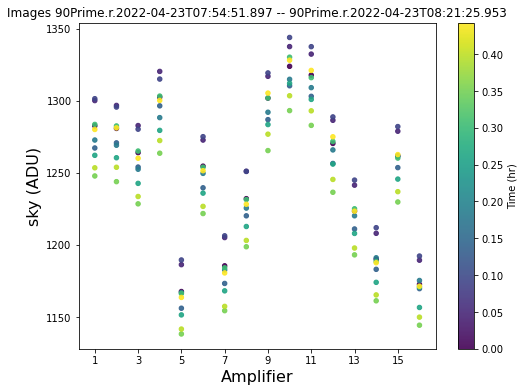

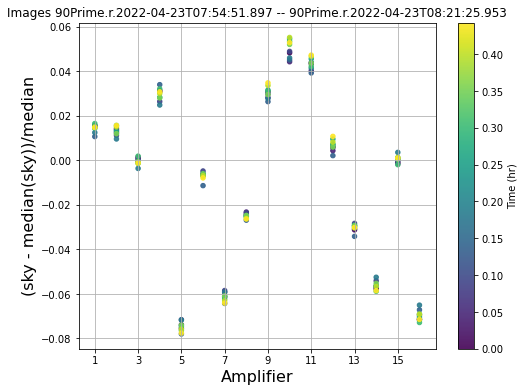

In [46]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tr0_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

## target 0, Halpha

In [47]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-Ha4nm_0')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time tha0_output_sky = mainsky(matchstring="*PA.fits",verbose=False)

CPU times: user 665 ms, sys: 114 ms, total: 779 ms
Wall time: 1min 53s


<Figure size 432x288 with 0 Axes>

10
90Prime.Ha4nm.2022-04-23T09:13:19.908
16 116.8479
90Prime.Ha4nm.2022-04-23T08:54:37.261
16 107.73053
90Prime.Ha4nm.2022-04-23T08:50:52.652
16 102.748405
90Prime.Ha4nm.2022-04-23T09:09:35.057
16 117.30121
90Prime.Ha4nm.2022-04-23T09:05:50.686
16 113.02373
90Prime.Ha4nm.2022-04-23T09:02:06.325
16 112.74388
90Prime.Ha4nm.2022-04-23T08:58:21.557
16 109.807846
90Prime.Ha4nm.2022-04-23T09:17:04.648
16 118.04532
90Prime.Ha4nm.2022-04-23T08:47:07.896
16 98.55568
90Prime.Ha4nm.2022-04-23T09:20:49.076
16 120.47956
10
med/ave offset for chip01 = 0.0071,0.0064
med/ave offset for chip02 = -0.0055,-0.0065
med/ave offset for chip03 = -0.0195,-0.0194
med/ave offset for chip04 = 0.0308,0.0301
med/ave offset for chip05 = -0.0389,-0.0393
med/ave offset for chip06 = 0.0171,0.0170
med/ave offset for chip07 = -0.0389,-0.0390
med/ave offset for chip08 = -0.0328,-0.0330
med/ave offset for chip09 = -0.0114,-0.0121
med/ave offset for chip10 = 0.1257,0.1302
med/ave offset for chip11 = 0.0522,0.0516
med/ave of

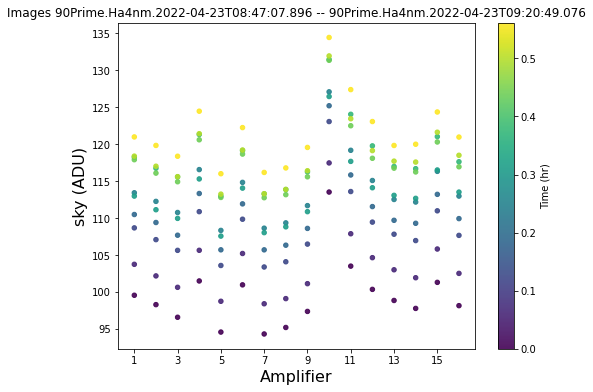

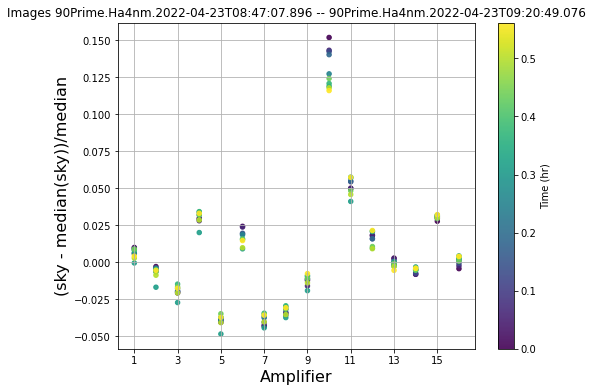

In [48]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tha0_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

In [49]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-Ha4nm_2')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time tha2_output_sky = mainsky(matchstring="*PA.fits",verbose=False)

CPU times: user 698 ms, sys: 112 ms, total: 810 ms
Wall time: 1min 54s


<Figure size 432x288 with 0 Axes>

10
90Prime.Ha4nm.2022-04-23T11:27:53.777
16 140.9201
90Prime.Ha4nm.2022-04-23T11:35:23.090
16 154.07047
90Prime.Ha4nm.2022-04-23T11:31:38.404
16 141.11035
90Prime.Ha4nm.2022-04-23T11:46:36.188
16 229.08963
90Prime.Ha4nm.2022-04-23T11:54:05.682
16 498.81802
90Prime.Ha4nm.2022-04-23T11:24:09.190
16 136.35861
90Prime.Ha4nm.2022-04-23T11:42:51.918
16 192.38345
90Prime.Ha4nm.2022-04-23T11:57:50.051
16 895.34015
90Prime.Ha4nm.2022-04-23T11:39:07.371
16 163.51889
90Prime.Ha4nm.2022-04-23T11:50:20.986
16 323.16248
10
med/ave offset for chip01 = 0.0044,0.0021
med/ave offset for chip02 = -0.0079,-0.0068
med/ave offset for chip03 = -0.0029,-0.0011
med/ave offset for chip04 = 0.0495,0.0509
med/ave offset for chip05 = -0.0253,-0.0270
med/ave offset for chip06 = 0.0027,-0.0018
med/ave offset for chip07 = -0.0127,-0.0121
med/ave offset for chip08 = -0.0121,-0.0115
med/ave offset for chip09 = -0.0006,0.0043
med/ave offset for chip10 = -0.0099,-0.0101
med/ave offset for chip11 = 0.0663,0.0674
med/ave o

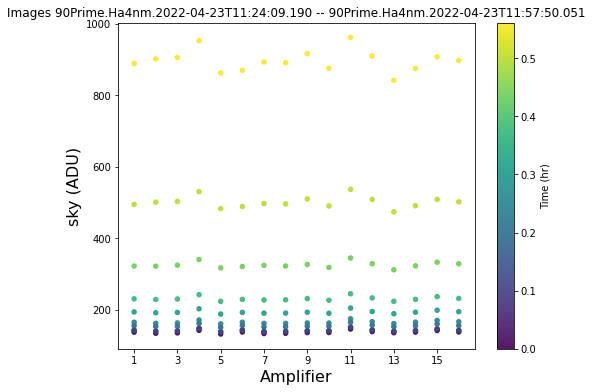

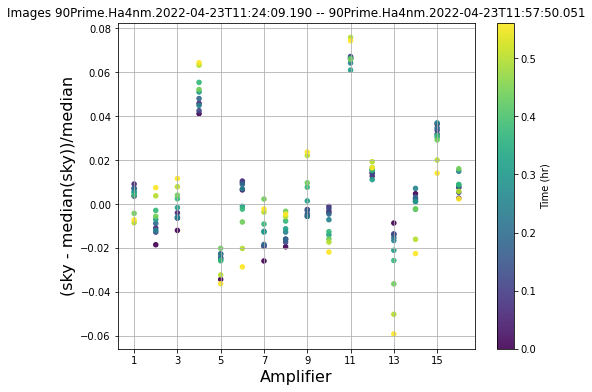

In [50]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tha2_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

In [51]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-Ha4nm_1')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time tha1_output_sky = mainsky(matchstring="*PA.fits",verbose=False)

CPU times: user 696 ms, sys: 174 ms, total: 870 ms
Wall time: 1min 55s


<Figure size 432x288 with 0 Axes>

10
90Prime.Ha4nm.2022-04-23T10:01:49.696
16 148.88431
90Prime.Ha4nm.2022-04-23T09:58:04.981
16 147.2192
90Prime.Ha4nm.2022-04-23T10:13:03.855
16 139.02408
90Prime.Ha4nm.2022-04-23T09:50:36.022
16 156.29822
90Prime.Ha4nm.2022-04-23T10:09:19.503
16 138.3096
90Prime.Ha4nm.2022-04-23T09:43:07.441
16 141.61539
90Prime.Ha4nm.2022-04-23T09:46:51.704
16 153.03494
90Prime.Ha4nm.2022-04-23T10:05:34.828
16 127.93145
90Prime.Ha4nm.2022-04-23T09:39:22.855
16 135.88245
90Prime.Ha4nm.2022-04-23T09:54:20.657
16 166.98192
10
med/ave offset for chip01 = -0.0019,-0.0015
med/ave offset for chip02 = -0.0199,-0.0210
med/ave offset for chip03 = 0.0141,0.0139
med/ave offset for chip04 = 0.0487,0.0491
med/ave offset for chip05 = -0.0286,-0.0281
med/ave offset for chip06 = 0.0023,0.0023
med/ave offset for chip07 = -0.0103,-0.0111
med/ave offset for chip08 = 0.0139,0.0129
med/ave offset for chip09 = -0.0055,-0.0056
med/ave offset for chip10 = -0.0085,-0.0079
med/ave offset for chip11 = 0.0804,0.0795
med/ave offs

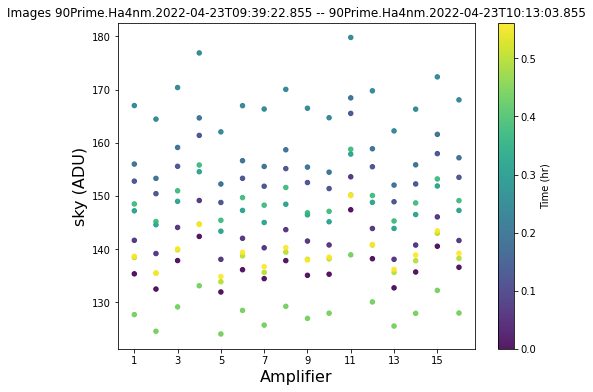

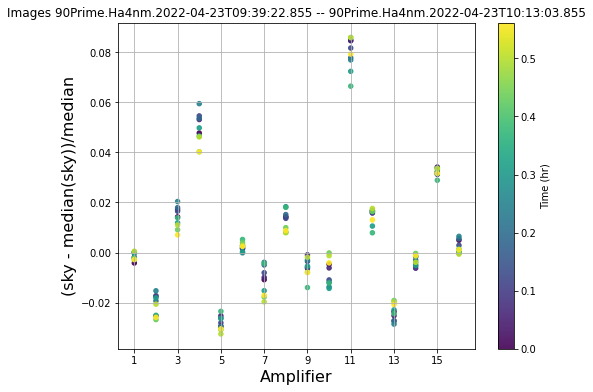

In [52]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tha1_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

# What if we did all rband from the night?

In [53]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r/P_IMAGES/')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time allr_output_sky = mainsky(matchstring="*P.fits",verbose=False)
# borrowing code from BOK_norm_amps


CPU times: user 1.54 s, sys: 307 ms, total: 1.85 s
Wall time: 4min 18s


ValueError: invalid literal for int() with base 10: '10P.fits'

<Figure size 432x288 with 0 Axes>

24
90Prime.r.2022-04-23T10:27:49.541
16 1766.25
90Prime.r.2022-04-23T10:22:12.645
16 849.25
90Prime.r.2022-04-23T10:33:18.622
16 1761.0
90Prime.r.2022-04-23T11:05:16.713
16 1738.0
90Prime.r.2022-04-23T10:38:48.076
16 1815.75
90Prime.r.2022-04-23T10:30:33.998
16 1752.5
90Prime.r.2022-04-23T08:05:51.243
16 1171.25
90Prime.r.2022-04-23T10:43:35.652
16 1732.5
90Prime.r.2022-04-23T08:00:21.342
16 1194.75
90Prime.r.2022-04-23T08:18:41.282
16 1147.5
90Prime.r.2022-04-23T10:25:02.501
16 940.5
90Prime.r.2022-04-23T12:06:03.279
16 28774.0
90Prime.r.2022-04-23T11:10:46.143
16 1919.25
90Prime.r.2022-04-23T11:13:30.813
16 1889.0
90Prime.r.2022-04-23T08:21:25.953
16 1171.75
90Prime.r.2022-04-23T08:10:27.516
16 1158.0
90Prime.r.2022-04-23T10:36:03.346
16 1770.25
90Prime.r.2022-04-23T08:13:11.779
16 1174.25
90Prime.r.2022-04-23T08:15:56.515
16 1144.0
90Prime.r.2022-04-23T07:54:51.897
16 1174.0
90Prime.r.2022-04-23T11:08:01.496
16 1851.25
90Prime.r.2022-04-23T08:03:06.088
16 1162.0
90Prime.r.2022-04-23

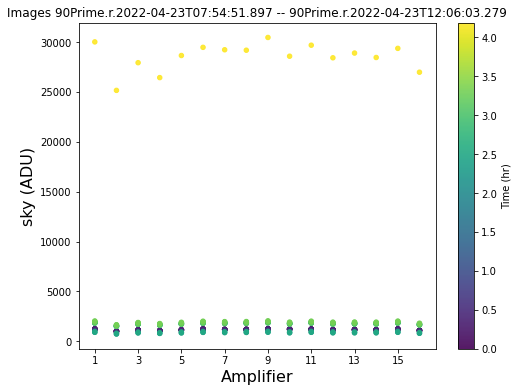

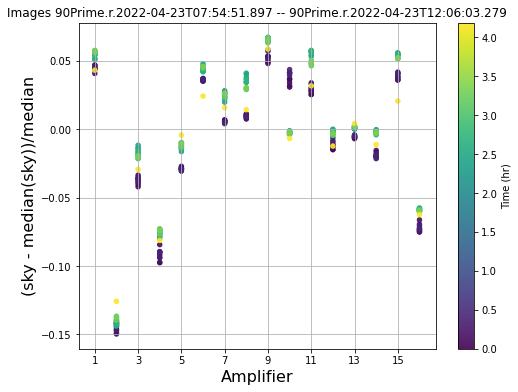

In [55]:
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(allr_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

24
90Prime.r.2022-04-23T10:27:49.541
16 1766.25
90Prime.r.2022-04-23T10:22:12.645
16 849.25
90Prime.r.2022-04-23T10:33:18.622
16 1761.0
90Prime.r.2022-04-23T11:05:16.713
16 1738.0
90Prime.r.2022-04-23T10:38:48.076
16 1815.75
90Prime.r.2022-04-23T10:30:33.998
16 1752.5
90Prime.r.2022-04-23T08:05:51.243
16 1171.25
90Prime.r.2022-04-23T10:43:35.652
16 1732.5
90Prime.r.2022-04-23T08:00:21.342
16 1194.75
90Prime.r.2022-04-23T08:18:41.282
16 1147.5
90Prime.r.2022-04-23T10:25:02.501
16 940.5
90Prime.r.2022-04-23T12:06:03.279
16 28774.0
90Prime.r.2022-04-23T11:10:46.143
16 1919.25
90Prime.r.2022-04-23T11:13:30.813
16 1889.0
90Prime.r.2022-04-23T08:21:25.953
16 1171.75
90Prime.r.2022-04-23T08:10:27.516
16 1158.0
90Prime.r.2022-04-23T10:36:03.346
16 1770.25
90Prime.r.2022-04-23T08:13:11.779
16 1174.25
90Prime.r.2022-04-23T08:15:56.515
16 1144.0
90Prime.r.2022-04-23T07:54:51.897
16 1174.0
90Prime.r.2022-04-23T11:08:01.496
16 1851.25
90Prime.r.2022-04-23T08:03:06.088
16 1162.0
90Prime.r.2022-04-23

(-0.17, 0.12)

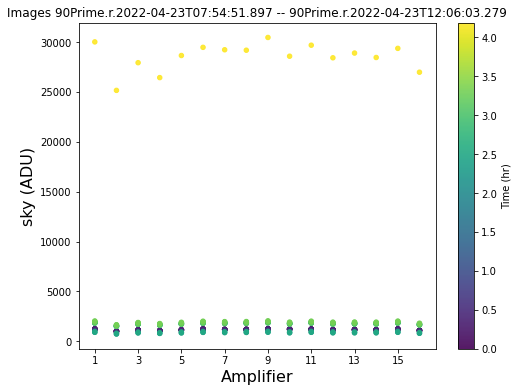

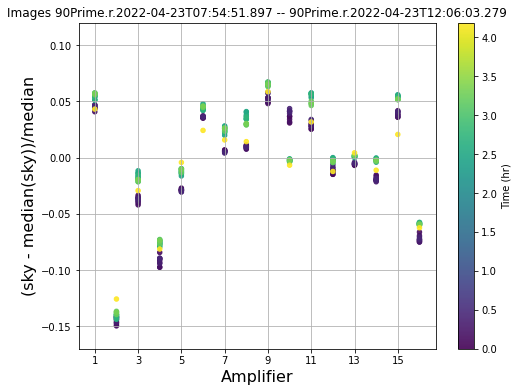

In [59]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(allr_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)
plt.ylim(-.17,.12)

CPU times: user 1.95 s, sys: 264 ms, total: 2.21 s
Wall time: 5min 24s
30
90Prime.Ha4nm.2022-04-23T09:09:35.057
16 109.0
90Prime.Ha4nm.2022-04-23T11:42:51.918
16 179.75
90Prime.Ha4nm.2022-04-23T09:02:06.325
16 104.75
90Prime.Ha4nm.2022-04-23T11:39:07.371
16 153.5
90Prime.Ha4nm.2022-04-23T08:47:07.896
16 91.25
90Prime.Ha4nm.2022-04-23T11:50:20.986
16 301.25
90Prime.Ha4nm.2022-04-23T09:58:04.981
16 137.25
90Prime.Ha4nm.2022-04-23T08:50:52.652
16 95.25
90Prime.Ha4nm.2022-04-23T11:31:38.404
16 132.0
90Prime.Ha4nm.2022-04-23T09:50:36.022
16 146.25
90Prime.Ha4nm.2022-04-23T09:05:50.686
16 104.5
90Prime.Ha4nm.2022-04-23T08:58:21.557
16 102.0
90Prime.Ha4nm.2022-04-23T09:17:04.648
16 109.0
90Prime.Ha4nm.2022-04-23T09:39:22.855
16 127.5
90Prime.Ha4nm.2022-04-23T10:13:03.855
16 130.5
90Prime.Ha4nm.2022-04-23T11:46:36.188
16 213.75
90Prime.Ha4nm.2022-04-23T11:54:05.682
16 462.5
90Prime.Ha4nm.2022-04-23T09:13:19.908
16 108.0
90Prime.Ha4nm.2022-04-23T10:01:49.696
16 139.25
90Prime.Ha4nm.2022-04-23T1

<Figure size 432x288 with 0 Axes>

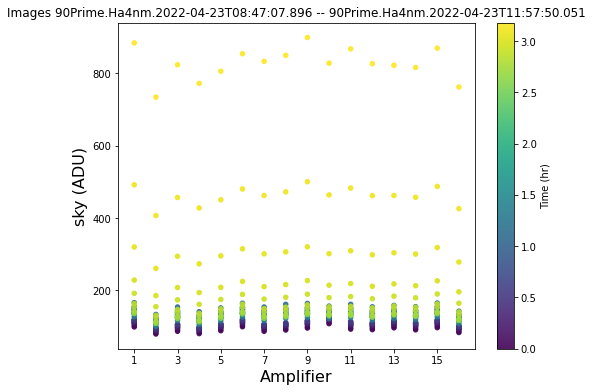

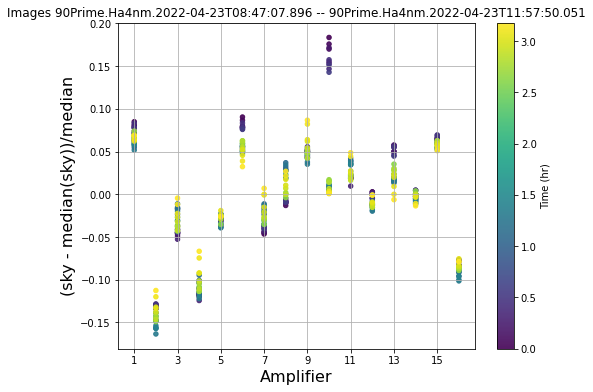

In [57]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-Ha4nm/P_IMAGES/')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time allha_output_sky = mainsky(matchstring="*P.fits",verbose=False)


30
90Prime.Ha4nm.2022-04-23T09:09:35.057
16 109.0
90Prime.Ha4nm.2022-04-23T11:42:51.918
16 179.75
90Prime.Ha4nm.2022-04-23T09:02:06.325
16 104.75
90Prime.Ha4nm.2022-04-23T11:39:07.371
16 153.5
90Prime.Ha4nm.2022-04-23T08:47:07.896
16 91.25
90Prime.Ha4nm.2022-04-23T11:50:20.986
16 301.25
90Prime.Ha4nm.2022-04-23T09:58:04.981
16 137.25
90Prime.Ha4nm.2022-04-23T08:50:52.652
16 95.25
90Prime.Ha4nm.2022-04-23T11:31:38.404
16 132.0
90Prime.Ha4nm.2022-04-23T09:50:36.022
16 146.25
90Prime.Ha4nm.2022-04-23T09:05:50.686
16 104.5
90Prime.Ha4nm.2022-04-23T08:58:21.557
16 102.0
90Prime.Ha4nm.2022-04-23T09:17:04.648
16 109.0
90Prime.Ha4nm.2022-04-23T09:39:22.855
16 127.5
90Prime.Ha4nm.2022-04-23T10:13:03.855
16 130.5
90Prime.Ha4nm.2022-04-23T11:46:36.188
16 213.75
90Prime.Ha4nm.2022-04-23T11:54:05.682
16 462.5
90Prime.Ha4nm.2022-04-23T09:13:19.908
16 108.0
90Prime.Ha4nm.2022-04-23T10:01:49.696
16 139.25
90Prime.Ha4nm.2022-04-23T11:27:53.777
16 131.75
90Prime.Ha4nm.2022-04-23T08:54:37.261
16 100.0
90

(-0.17, 0.12)

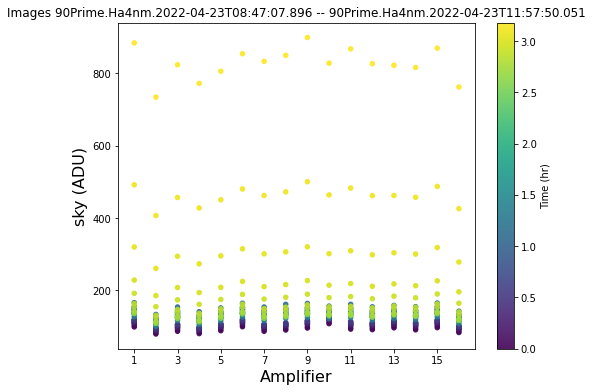

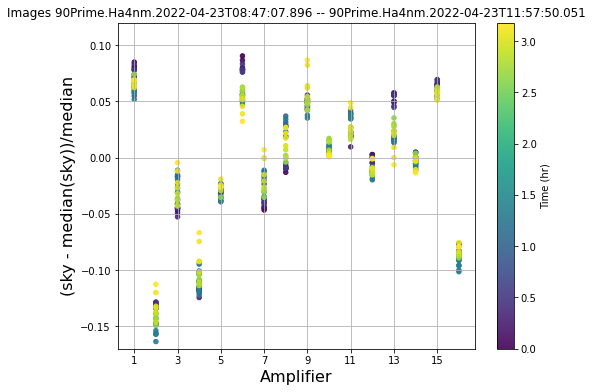

In [58]:
# borrowing code from BOK_norm_amps
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(allha_output_sky)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)
plt.ylim(-.17,.12)

# Trying to run on all of the r-band images from the entire apr 2022 run

In [ ]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/allnights/target-r/')
%run ~/github/HalphaImaging/python3/BOK_measure_sky.py
%time allha_output_sky = mainsky(matchstring="*P.fits",verbose=False)


Bias for entire run

Parsing 395 files
10
10


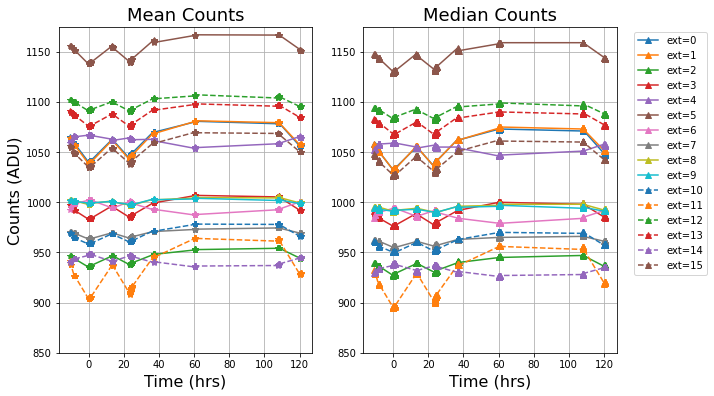

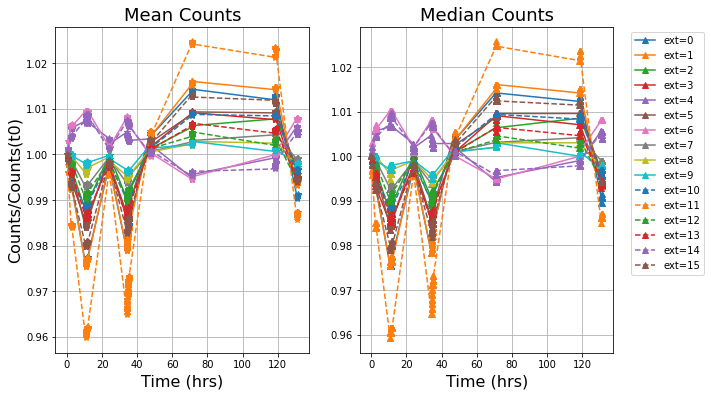

In [61]:
# need to run on the raw images
os.chdir("/media/rfinn/hdata/BOK2022Apr/allnights/BIAS/RAWDATA/")
%run ~/github/HalphaImaging/python3/BOK_bias_stability.py

In [68]:
time_sorted = delta_time[isorted]
med_sorted = bias_median[isorted]

In [69]:
med_sorted.shape

(395, 16)

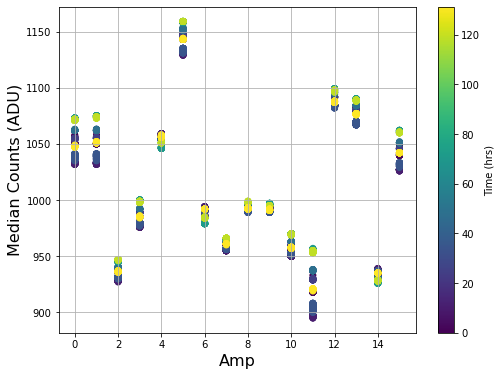

In [77]:
nbias, namp = med_sorted.shape

plt.figure(figsize=(8,6))
for i in range(namp):
    plt.scatter(np.ones(nbias)*i,med_sorted[:,i],c=time_sorted)
plt.colorbar(label='Time (hrs)')
plt.xlabel('Amp',fontsize=16)
plt.ylabel('Median Counts (ADU)',fontsize=16)
plt.grid()

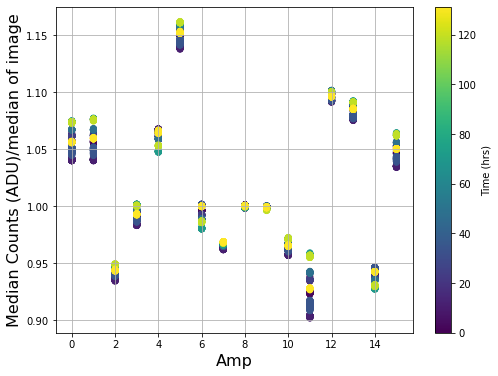

In [78]:
nbias, namp = med_sorted.shape

plt.figure(figsize=(8,6))
for i in range(nbias):
    plt.scatter(np.arange(namp),med_sorted[i,:]/np.median(med_sorted[i,:]),c=time_sorted[i]*np.ones(namp),vmin=np.min(time_sorted),vmax=np.max(time_sorted))
plt.colorbar(label='Time (hrs)')
plt.xlabel('Amp',fontsize=16)
plt.ylabel('Median Counts (ADU)/median of image',fontsize=16)
plt.grid()

### scatter in ADU in each amp

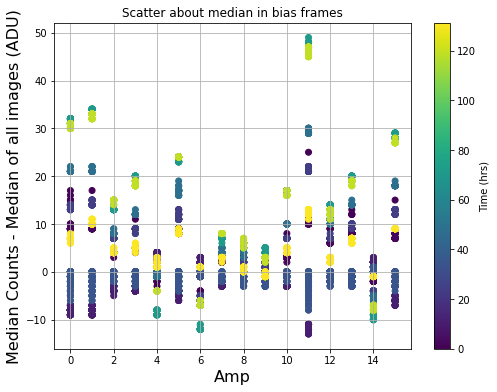

In [79]:
nbias, namp = med_sorted.shape

plt.figure(figsize=(8,6))
for i in range(namp):
    plt.scatter(np.ones(nbias)*i,med_sorted[:,i]-np.median(med_sorted[:,i]),c=time_sorted)
plt.colorbar(label='Time (hrs)')
plt.xlabel('Amp',fontsize=16)
plt.ylabel('Median Counts - Median of all images (ADU)',fontsize=16)
plt.title("Scatter about median in bias frames")
plt.grid()

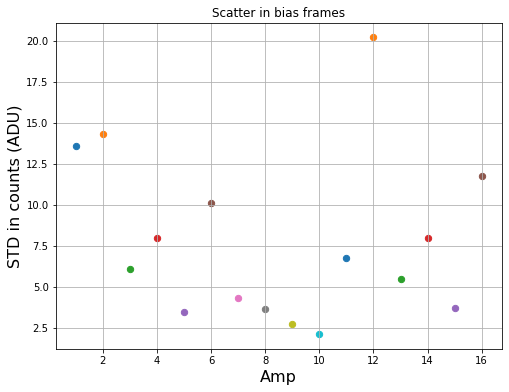

In [87]:
nbias, namp = med_sorted.shape

plt.figure(figsize=(8,6))
for i in range(namp):
    plt.scatter(i+1,np.std(med_sorted[:,i]),s=40)
#plt.colorbar(label='Time (hrs)')
plt.xlabel('Amp',fontsize=16)
plt.ylabel('STD in counts (ADU)',fontsize=16)
plt.title("Scatter in bias frames")
plt.grid()

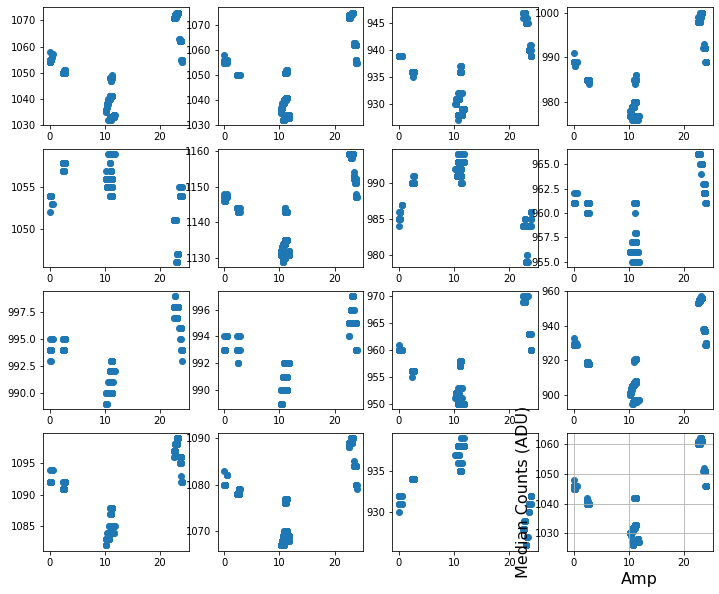

In [109]:
nbias, namp = med_sorted.shape

reltime = time_sorted % 24
plt.figure(figsize=(12,10))
for j in range(namp):
    plt.subplot(4,4,j+1)
    #reltime = ((time_sorted[i]/24) - int(time_sorted[i]/24))*24
    plt.scatter(reltime,med_sorted[:,j])
#plt.colorbar(label='Time (hrs)')
plt.xlabel('Amp',fontsize=16)
plt.ylabel('Median Counts (ADU)',fontsize=16)
plt.grid()

In [122]:
time[isorted]

<Time object: scale='utc' format='iso' value=['2022-04-23 01:47:08.204' '2022-04-23 02:17:38.027'
 '2022-04-23 02:18:18.223' '2022-04-23 02:18:58.513'
 '2022-04-23 02:19:38.605' '2022-04-23 04:08:10.794'
 '2022-04-23 04:08:50.973' '2022-04-23 04:09:31.120'
 '2022-04-23 04:10:11.227' '2022-04-23 04:10:51.406'
 '2022-04-23 04:11:31.768' '2022-04-23 04:12:11.859'
 '2022-04-23 04:12:51.913' '2022-04-23 04:13:32.054'
 '2022-04-23 04:14:12.357' '2022-04-23 04:14:52.505'
 '2022-04-23 04:15:32.594' '2022-04-23 04:16:12.750'
 '2022-04-23 04:16:52.999' '2022-04-23 04:17:33.157'
 '2022-04-23 04:18:13.259' '2022-04-23 04:18:53.465'
 '2022-04-23 04:19:33.639' '2022-04-23 04:20:13.900'
 '2022-04-23 04:20:54.045' '2022-04-23 04:21:34.328'
 '2022-04-23 04:22:14.465' '2022-04-23 04:22:54.885'
 '2022-04-23 04:23:35.038' '2022-04-23 04:24:15.265'
 '2022-04-23 04:24:55.395' '2022-04-23 04:25:35.590'
 '2022-04-23 04:26:15.843' '2022-04-23 04:26:55.995'
 '2022-04-23 04:27:36.114' '2022-04-23 04:28:16.315'
 

amp 1: slope=-54.46 +/- 1.28
	 amp 1: slope=-40.70 +/- 0.98
amp 2: slope=-56.10 +/- 1.46
	 amp 2: slope=-41.57 +/- 0.92
amp 3: slope=-24.08 +/- 0.61
	 amp 3: slope=-19.30 +/- 0.46
amp 4: slope=-31.60 +/- 0.78
	 amp 4: slope=-23.28 +/- 0.47
amp 5: slope=9.96 +/- 0.59
	 amp 5: slope=3.53 +/- 0.67
amp 6: slope=-40.60 +/- 0.95
	 amp 6: slope=-31.72 +/- 0.53
amp 7: slope=16.97 +/- 0.44
	 amp 7: slope=11.18 +/- 0.43
amp 8: slope=-14.12 +/- 0.40
	 amp 8: slope=-12.08 +/- 0.27
amp 9: slope=-10.70 +/- 0.27
	 amp 9: slope=-8.03 +/- 0.33
amp 10: slope=-8.14 +/- 0.24
	 amp 10: slope=-5.72 +/- 0.33
amp 11: slope=-26.00 +/- 0.74
	 amp 11: slope=-17.14 +/- 0.40
amp 12: slope=-79.48 +/- 2.05
	 amp 12: slope=-57.56 +/- 1.35
amp 13: slope=-22.81 +/- 0.39
	 amp 13: slope=-18.73 +/- 0.32
amp 14: slope=-32.34 +/- 0.70
	 amp 14: slope=-26.34 +/- 0.37
amp 15: slope=14.89 +/- 0.34
	 amp 15: slope=11.22 +/- 0.26
amp 16: slope=-46.24 +/- 1.20
	 amp 16: slope=-34.38 +/- 0.69
{1:-40.699, 2:-41.567, 3:-19.300, 4:-

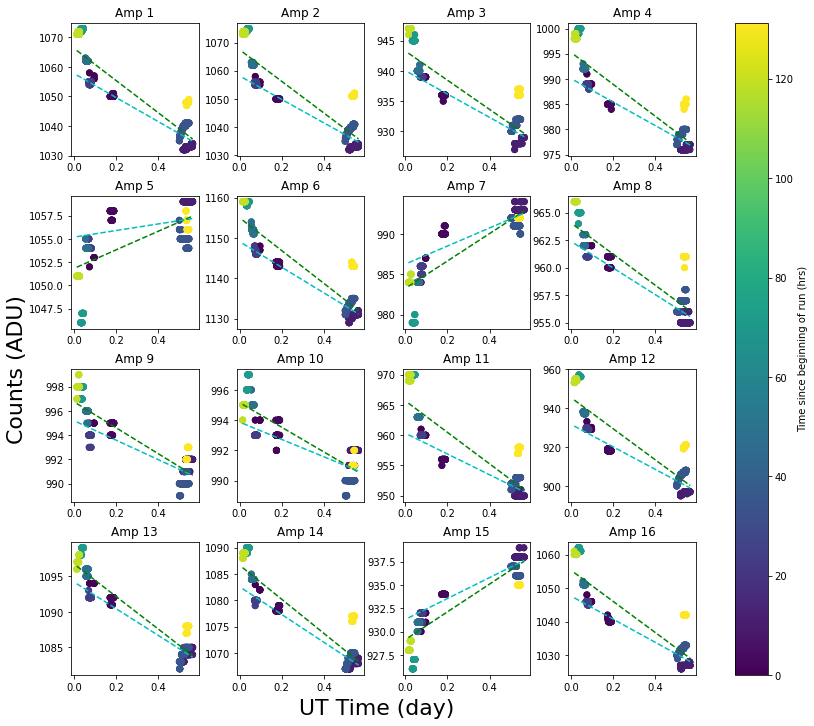

In [269]:
test_time = time.mjd %1
#print(test_time[isorted])

test_time_sorted = test_time[isorted]
nbias, namp = med_sorted.shape

allax = []
xline = np.linspace(min(test_time_sorted),max(test_time_sorted),100)
plt.figure(figsize=(14,12))
plt.subplots_adjust(wspace=.3,hspace=.3)
gaindict = "{"
for j in range(namp):
    plt.subplot(4,4,j+1)
    #reltime = ((time_sorted[i]/24) - int(time_sorted[i]/24))*24
    
    
    # polynomial fit to all data
    plt.scatter(test_time_sorted,med_sorted[:,j],c=time_sorted)
    c_cov = np.polyfit(test_time_sorted,med_sorted[:,j],1,cov=True)
    c = c_cov[0]
    cov = c_cov[1]
    print(f"amp {j+1}: slope={c[0]:.2f} +/- {np.sqrt(cov[0][0]):.2f}") 
    yline = np.polyval(c,xline)
    #plt.plot(xline,yline,'k--')

    plt.scatter(test_time_sorted,med_sorted[:,j],c=time_sorted)
    c = np.polyfit(test_time_sorted,med_sorted[:,j],1)
    yline = np.polyval(c,xline)
    plt.plot(xline,yline,'g--')
    
    
    # plot only time < 80
    flag = time_sorted < 40
    c2,cov = np.polyfit(test_time_sorted[flag],med_sorted[:,j][flag],1,cov=True)
    yline = np.polyval(c2,xline)
    print(f"\t amp {j+1}: slope={c2[0]:.2f} +/- {np.sqrt(cov[0][0]):.2f}") 
    plt.plot(xline,yline,'c--')
    
    # plot only time < 80
    flag = time_sorted > 60
    c3 = np.polyfit(test_time_sorted[flag],med_sorted[:,j][flag],1)
    yline = np.polyval(c3,xline)
    
    gaindict += f"{j+1}:{c2[0]:.3f}, "
    #plt.plot(xline,yline,'r--')
    allax.append(plt.gca())
    plt.title(f'Amp {j+1}')
    if j == 4:
        ax = plt.gca()
        plt.text(-.5,-.3,"Counts (ADU)", transform = ax.transAxes, verticalalignment='center',fontsize=22,rotation=90)
ax = plt.gca()
plt.text(-1.5,-.3,"UT Time (day)", transform = ax.transAxes, horizontalalignment='center',fontsize=22)
plt.colorbar(ax=allax,label='Time since beginning of run (hrs)')
gaindict += "}"
print(gaindict)
#plt.xlabel('Amp',fontsize=16)
#plt.ylabel('Median Counts (ADU)',fontsize=16)
#plt.grid()

In [265]:
c2

array([ -34.37838802, 1047.60979012])

In [220]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/BIAS/RAWDATA')

In [202]:
import glob
from ccdproc import ImageFileCollection

In [169]:
bias_files = glob.glob('*1P.fits')
dateobs = []
for b in bias_files:
    header = fits.getheader(b)
    dateobs.append(header['DATE-OBS'])
dateobs = Time(dateobs)


In [197]:
dt = dateobs.to_datetime()

In [198]:
goodtimes = []
for i,d in enumerate(dt):
    if d.hour < 7:
        goodtimes.append(dateobs[i])

In [237]:
dateobs[0].value

'2022-04-23T04:30:57.177'

In [228]:
keys = ['imagetyp','DATE-OBS']
ic = ImageFileCollection(os.getcwd(),keywords=keys,glob_include='ut*.fits')


In [230]:
ic.summary['DATE-OBS'][0]

'2022-04-23'

In [209]:
test = ic.filter(imagetype='zero', mjd-obs%1 < 0.3)

SyntaxError: positional argument follows keyword argument (<ipython-input-209-b2e9bb324fdc>, line 1)

In [212]:
bias = ic.files_filtered(imagetyp='zero')

In [213]:
bias

array([], dtype='<U45')

In [243]:
test = np.array[1 2 3]

SyntaxError: invalid syntax (<ipython-input-243-962280070667>, line 1)

In [246]:
crosstalk_coeffs = {
    1: [0,	-23,	-33,	-30,	1,	2,	2,	2,	1,	-1,	1,	1,	2,	2,	1,	3],
    2: [-17,	0,	-24,	-23,	1,	1,	2,	3,	1,	0,	1,	1,	2,	3,	3,	3],
    3: [-10,	-8,	0,	-11,	1,	1,	2,	2,	1,	0,	1,	1,	2,	2,	2,	4],
    4: [-11,	-9,	-11,	0,	2,	-4,	2,	2,	1,	0,	0,	1,	1,	2,	2,	2],
    5: [3,	3,	3,	3,	0,	-33,	-37,	-27,	2,	-1,	2,	1,	0,	0,	1,	2],
    6: [3,	3,	4,	3,	-10,	0,	-17,	-14,	3,	2,	4,	3,	1,	1,	1,	2],
    7: [3,	3,	3,	3,	-11,	-14,	0,	-6,	2,	1,	2,	2,	1,	2,	2,	2],
    8: [3,	3,	4,	4,	-9,	-6,	-5,	0,	1,	3,	4,	2,	0,	1,	1,	1],
    9: [3,	2,	3,	2,	1,	1,	2,	2,	0,	-16,	-23,	-19,	3,	3,	2,	2],
    10: [2,	1,	2,	1,	0,	1,	1,	1,	-31,	0,	-40,	-32,	2,	2,	2,	2],
    11: [3,	2,	2,	1,	0,	-1,	1,	1,	-25,	-16,	0,	-17,	2,	2,	1,	2],
    12: [3,	2,	3,	2,	1,	1,	2,	2,	-15,	-11,	-8,	0,	-2,	1,	2,	1],
    13: [4,	3,	4,	3,	-1,	0,	1,	1,	-9,	0,	1,	3,	0,	-24,	-26,	-22],
    14: [4,	3,	4,	3,	0,	1,	1,	2,	-9,	1,	1,	-2,	-24,	0,	-26,	-22],
    15: [4,	4,	5,	4,	1,	1,	1,	2,	-11,	0,	1,	3,	-13,	-10,	0,	-5 ],
    16: [5,	5,	5,	5,	-1,	1,	1,	2,	-7,	-3,	-1,	0,	-15,	-14,	-12,	0  ]
    }


crosstalk = np.zeros((16,16))
for i in range(16):
    coeffs = crosstalk_coeffs[i+1]
    for j,c in enumerate(coeffs):
        crosstalk[i,j] = c
    


In [249]:
crosstalk[0][2]*4

-132.0

In [250]:
!pwd

/media/rfinn/hdata/BOK2022Apr/20220423/BIAS/RAWDATA


In [252]:
timage = 'ut20220423.0169.fits'
t = fits.open(timage)

In [254]:
len(t)

17

In [256]:
t[1].data.shape

(2068, 2036)

In [259]:
os.chdir('../../target-r')

In [263]:
os.chdir('../RAWDATA')

In [264]:
os.listdir()

['ut20220423.0113.fits',
 'ut20220423.0110.fits',
 'ut20220423.0107.fits',
 'ut20220423.0147.fits',
 'ut20220423.0111.fits',
 'ut20220423.0152.fits',
 'ut20220423.0153.fits',
 'ut20220423.0146.fits',
 'ut20220423.0141.fits',
 'ut20220423.0108.fits',
 'ut20220423.0114.fits',
 'ut20220423.0140.fits',
 'ut20220423.0154.fits',
 'ut20220423.0142.fits',
 'ut20220423.0168.fits',
 'ut20220423.0109.fits',
 'ut20220423.0148.fits',
 'ut20220423.0106.fits',
 'ut20220423.0144.fits',
 'ut20220423.0143.fits',
 'ut20220423.0112.fits',
 'ut20220423.0145.fits',
 'ut20220423.0155.fits',
 'ut20220423.0105.fits']

# Checking for overscan regions

In [278]:
def display_image(image,percent=99.9,lowrange=False,mask=None,sigclip=True):
    from astropy.stats import sigma_clip
    from astropy.visualization import simple_norm
    #lowrange=False
    if sigclip:
        clipped_data = sigma_clip(image,sigma_lower=5,sigma_upper=5)#,grow=10)
    else:
        clipped_data = image
    if lowrange:
        norm = simple_norm(clipped_data, stretch='linear',percent=percent)
    else:
        norm = simple_norm(clipped_data, stretch='asinh',percent=percent)

    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')
    #v1,v2=scoreatpercentile(image,[.5,99.5])            
    #plt.imshow(image, cmap='gray_r',vmin=v1,vmax=v2,origin='lower')    


In [271]:
imfile = '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-r/ut20220423.0105.fits'
rhdu = fits.open(imfile)

In [274]:
for i in range(1,len(rhdu)): print(rhdu[i].data.shape)

(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)
(2068, 2036)


In [277]:
test.shape

(2068,)

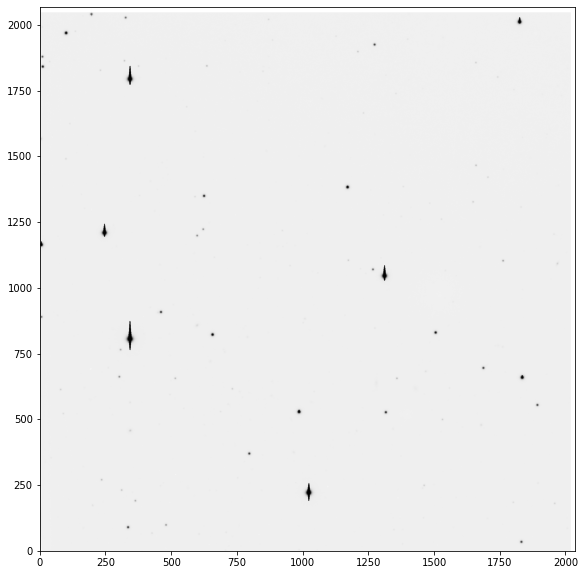

In [280]:
plt.figure(figsize=(10,10))
display_image(rhdu[1].data)

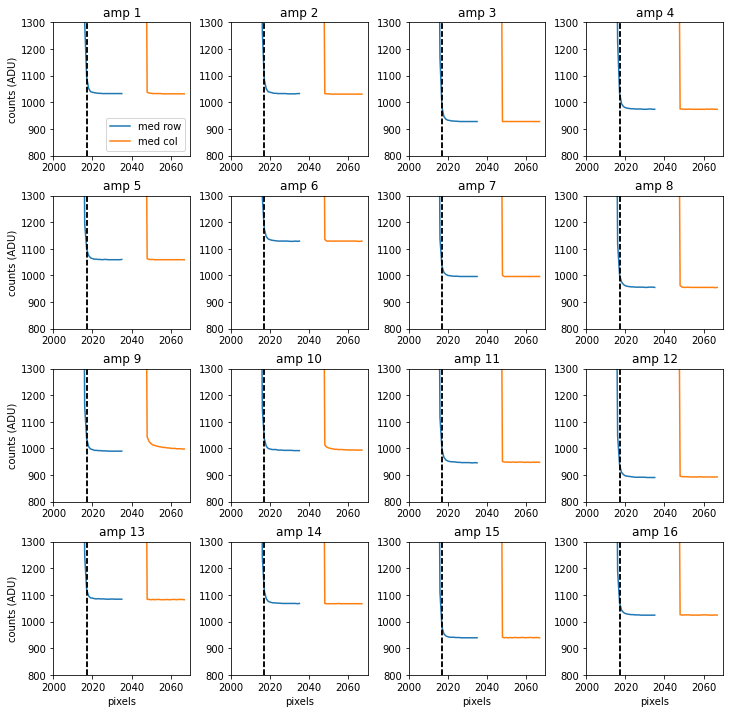

In [314]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=.3,wspace=.3)
labels = ['med row','med col']
for i in range(1,len(rhdu)):
    plt.subplot(4,4,i)
    for j in range(2):
        test = np.median(rhdu[i].data,axis=j)
        plt.plot(test,label=labels[j])
        plt.axvline(x=2017,ls='--',color='k')
    if i == 1:
        plt.legend()
    plt.title(f'amp {i}')
    plt.ylim(800,1300)
    plt.xlim(2000,2070)
    if i > 12:
        plt.xlabel('pixels')
    if i%4 == 1:
        plt.ylabel('counts (ADU)')

# WTF?

do the flats have overscan region on as well?

In [303]:
imfile = '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/FLAT-r/ut20220423.FLAT.0025.fits'
fhdu = fits.open(imfile)

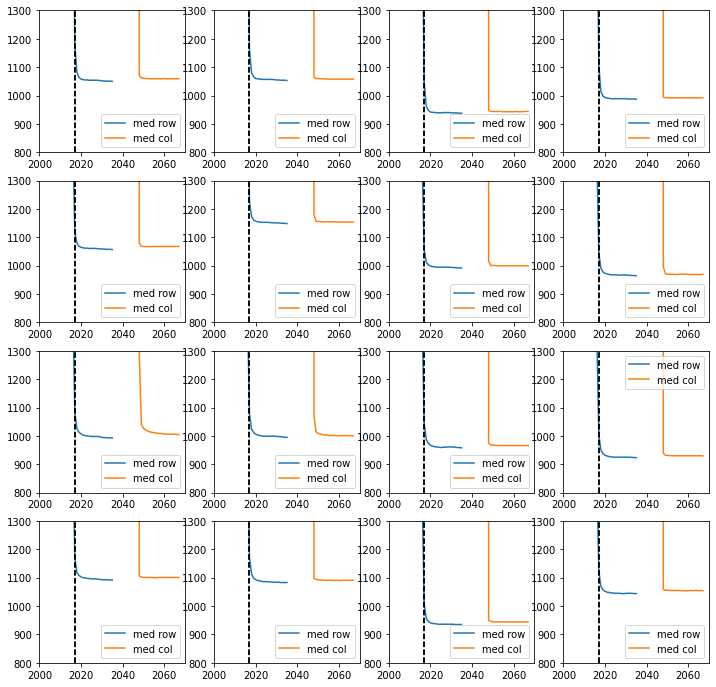

In [309]:
plt.figure(figsize=(12,12))
labels = ['med row','med col']
for i in range(1,len(rhdu)):
    plt.subplot(4,4,i)
    for j in range(2):
        test = np.median(fhdu[i].data,axis=j)
        plt.plot(test,label=labels[j])
        plt.axvline(x=2017,ls='--',color='k')
    if i == 1:
        plt.legend()
    plt.ylim(800,1300)
    plt.xlim(2000,2070)
    plt.legend()

# Halpha image

In [315]:
imfile = '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm/RAWDATA/ut20220423.0118.fits'
hhdu = fits.open(imfile)

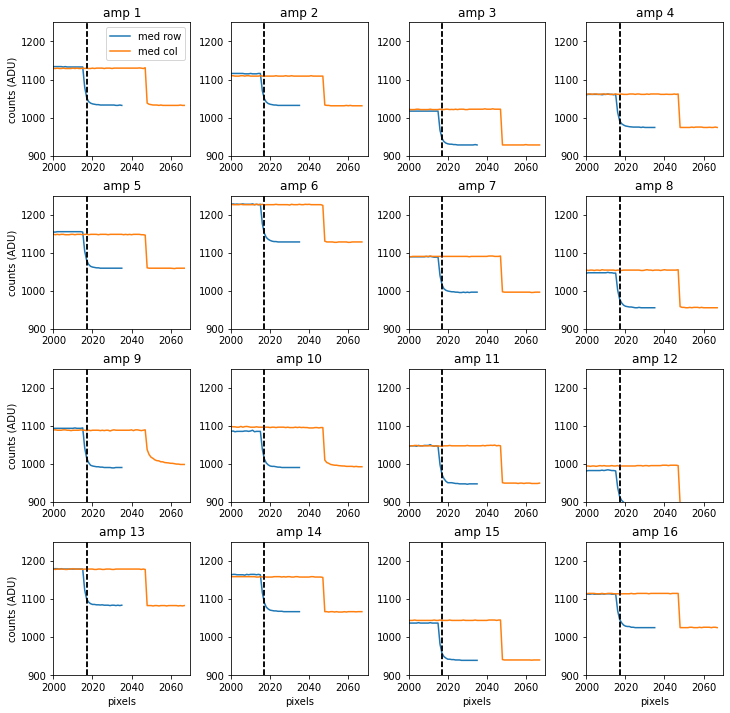

In [319]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=.3,wspace=.3)
labels = ['med row','med col']
for i in range(1,len(rhdu)):
    xmin = 2000
    plt.subplot(4,4,i)
    for j in range(2):
        test = np.median(hhdu[i].data,axis=j)
        plt.plot(test,label=labels[j])
        plt.axvline(x=2017,ls='--',color='k')
    if i == 1:
        plt.legend()
    plt.title(f'amp {i}')
    plt.ylim(900,1250)
    plt.xlim(2000,2070)
    if i > 12:
        plt.xlabel('pixels')
    if i%4 == 1:
        plt.ylabel('counts (ADU)')

In [322]:
os.chdir('../../../')

In [324]:
os.chdir('gain_cor_no_bias_cor')

In [326]:
os.chdir('20220423')

In [327]:
ls

BIAS/        GLOBALWEIGHTS/  target-Ha4nm_0/  target-r/
FLAT-Ha4nm/  LATEBIAS/       target-Ha4nm_1/  WEIGHTS/
FLAT-r/      target-Ha4nm/   target-Ha4nm_2/


In [328]:
subfolders = [f.path for f in os.scandir(os.getcwd()) if f.is_dir()]

In [336]:
filelist = []
for f in subfolders:
    if 'target-Ha4nm' in f:
        filelist += glob.glob(f+'/*.fits')
        

In [340]:
a1 = []
for f in filelist:
    if '_1PA.fits' in f:
        a1.append(f)

In [341]:
a1

['/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:09:35.057_1PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:54:37.261_1PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:50:52.652_1PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:58:21.557_1PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:47:07.896_1PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:20:49.076_1PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:17:04.648_1PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:02:06.325_1PA

In [342]:
from astropy import units as u

In [343]:
u.electron

Unit("electron")

# Super Sky Flat

trying to make super sky flat - definitely a slow process!



In [344]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423')

In [346]:
%time %run ~/github/HalphaImaging/python3/BOK_03_sky_flat.py Ha4nm

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.34 µs
processing 30 images for amp 1 skyflat
getting object masks
combining
processing 30 images for amp 2 skyflat
getting object masks
combining
processing 30 images for amp 3 skyflat
getting object masks
combining
processing 30 images for amp 4 skyflat
getting object masks
combining
processing 30 images for amp 5 skyflat
getting object masks
combining
processing 30 images for amp 6 skyflat
getting object masks
combining
processing 30 images for amp 7 skyflat
getting object masks
combining
processing 30 images for amp 8 skyflat
getting object masks
combining
processing 30 images for amp 9 skyflat
getting object masks
combining
processing 30 images for amp 10 skyflat
getting object masks
combining
processing 30 images for amp 11 skyflat
getting object masks
combining
processing 30 images for amp 12 skyflat
getting object masks
combining
processing 30 images for amp 13 skyflat
getting object masks
combining
processing 30 images f

<Figure size 432x288 with 0 Axes>

# testing object masking

this is the most difficult case

In [348]:
tfile = 'target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:47:07.896_10PA.fits'

In [357]:
from scipy.stats import scoreatpercentile
from photutils import make_source_mask

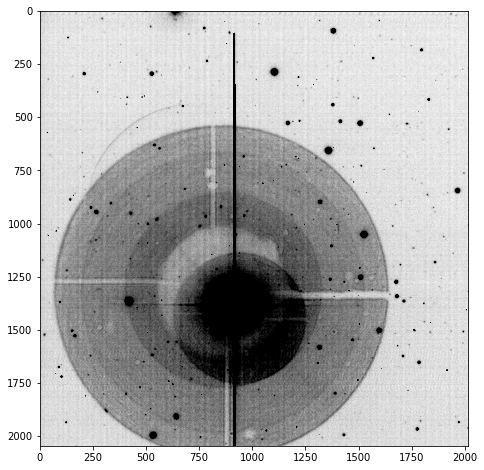

In [394]:
test = fits.open(tfile)
v1 = scoreatpercentile(test[0].data,5)
v2 = scoreatpercentile(test[0].data,95)
plt.figure(figsize=(10,8))
plt.imshow(test[0].data,vmin=v1,vmax=v2,cmap='Greys')

In [420]:
%time mask = make_source_mask(test[0].data,nsigma=3.,npixels=5,dilate_size=50)

CPU times: user 13 s, sys: 0 ns, total: 13 s
Wall time: 9.05 s


In [421]:
x,y = mask.shape
np.sum(mask)/(x*y)

0.1811367349375486

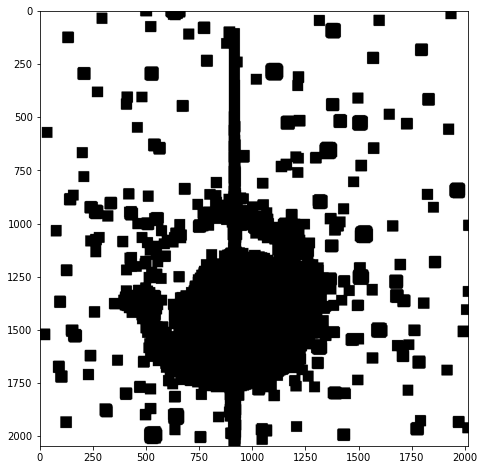

In [412]:
plt.figure(figsize=(10,8))
plt.imshow(mask,cmap='Greys')

In [384]:
%time %run ~/github/HalphaImaging/python3/BOK_03_sky_flat.py Ha4nm

processing 30 images for amp 10 skyflat
getting object masks
combining


/home/rfinn/github/HalphaImaging/python3/BOK_03_sky_flat.py:110: UserWarning: Warning: converting a masked element to nan.
  method='median', scale=1/np.array(this_median),


CPU times: user 4min 59s, sys: 10.9 s, total: 5min 10s
Wall time: 2min 16s


/home/rfinn/github/HalphaImaging/python3/BOK_03_sky_flat.py:113: UserWarning: Warning: converting a masked element to nan.
  all_med.append(np.median(np.array(this_median)))


<Figure size 432x288 with 0 Axes>

/home/rfinn/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/rfinn/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


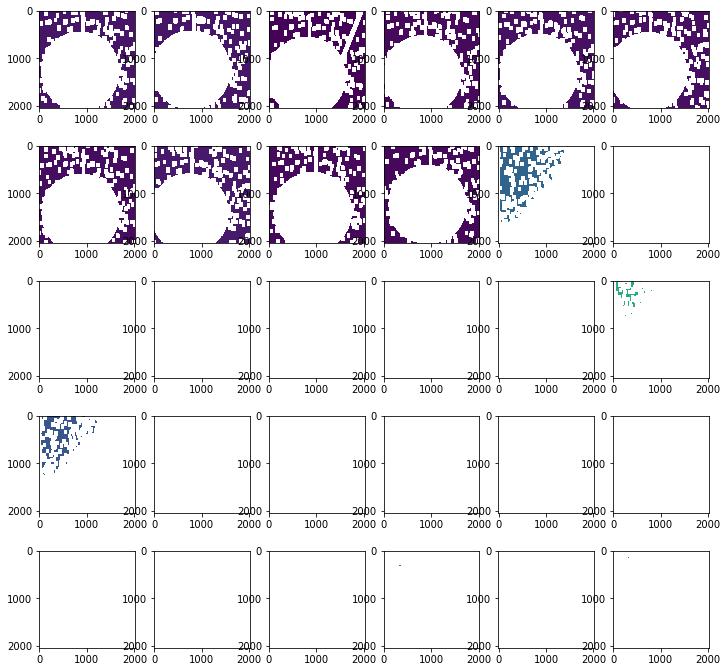

In [386]:
plt.figure(figsize=(12,12))
for i,m in enumerate(masked_images):
    plt.subplot(5,6,i+1)
    plt.imshow(m)

In [393]:
testsky = ccdp.combine(masked_images,
                           method='median', scale=inv_median,
                           clip_extreme=True, nlow=1, nhigh=1,unit=u.electron)

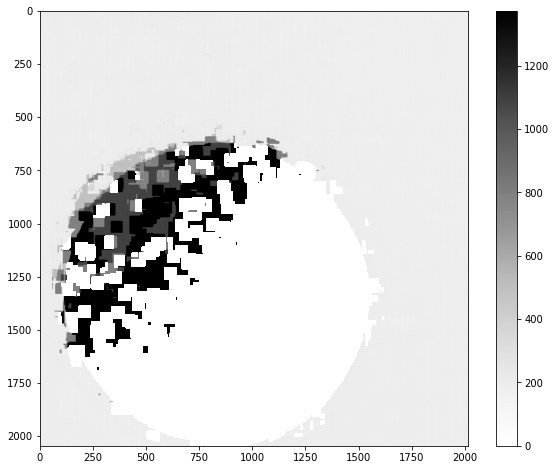

In [392]:
v1 = scoreatpercentile(testsky,5)
v2 = scoreatpercentile(testsky,95)
plt.figure(figsize=(10,8))
plt.imshow(testsky,vmin=v1,vmax=v2,cmap='Greys')
plt.colorbar()

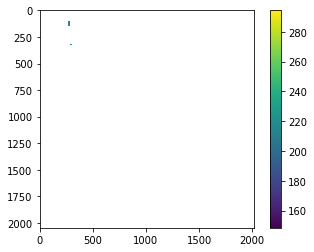

In [401]:
plt.imshow(masked_images[25])
plt.colorbar()

In [403]:
f2 = filelist[25]
test2 = fits.getdata(f2)

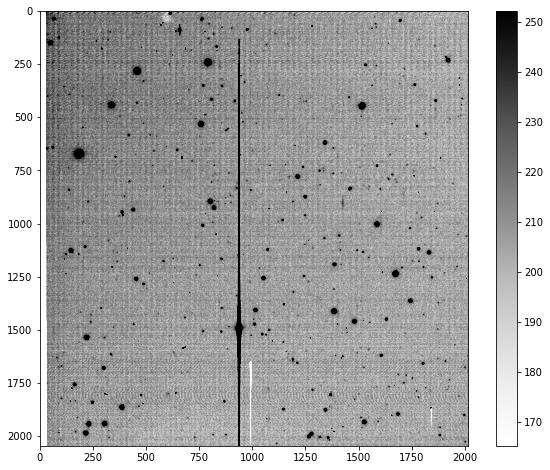

In [405]:
v1 = scoreatpercentile(test2,5)
v2 = scoreatpercentile(test2,95)
plt.figure(figsize=(10,8))
plt.imshow(test2,vmin=v1,vmax=v2,cmap='Greys')
plt.colorbar()

In [544]:
%time mask2 = make_source_mask(test2,nsigma=3.,npixels=5,dilate_size=20)

CPU times: user 7.22 s, sys: 0 ns, total: 7.22 s
Wall time: 2.55 s


In [418]:
x,y = mask2.shape
np.sum(mask2)/(x*y)

0.18584255276602396

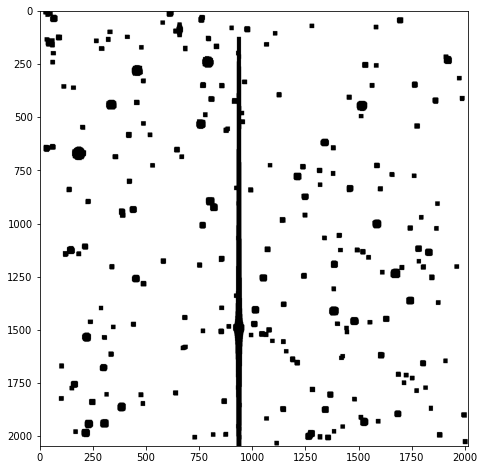

In [545]:
plt.figure(figsize=(10,8))
plt.imshow(mask2,cmap='Greys')

0.37176421937930093

In [422]:
%time %run ~/github/HalphaImaging/python3/BOK_03_sky_flat.py Ha4nm

processing 30 images for amp 10 skyflat
getting object masks
combining
CPU times: user 8min 7s, sys: 9.54 s, total: 8min 17s
Wall time: 4min 53s


<Figure size 432x288 with 0 Axes>

In [423]:
def display(data):
    v1 = scoreatpercentile(data,5)
    v2 = scoreatpercentile(data,95)
    plt.figure(figsize=(10,8))
    plt.imshow(data,vmin=v1,vmax=v2,cmap='Greys')
    plt.colorbar()

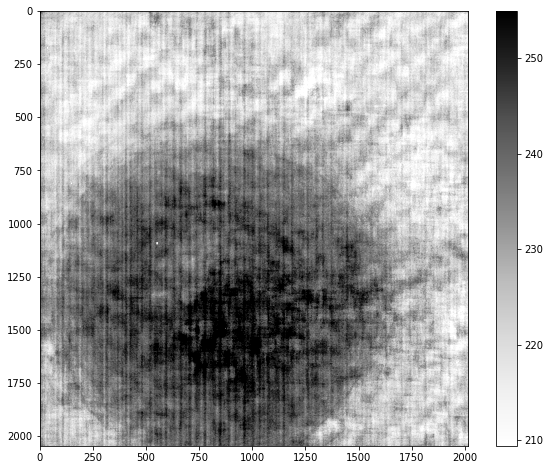

In [424]:
display(skyflat)

In [427]:
skyflat2 = ccdp.combine(masked_images,method='median', scale=inv_median,
                           sigma_clip=True, sigma_clip_low_thresh=1.5, sigma_clip_high_thresh=1.5,
                           sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,unit=u.electron)

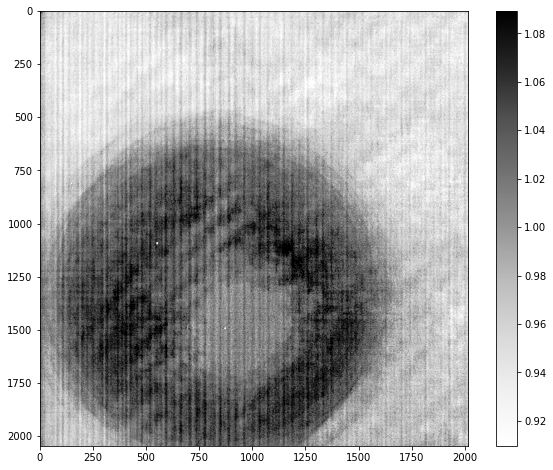

In [428]:
display(skyflat2)

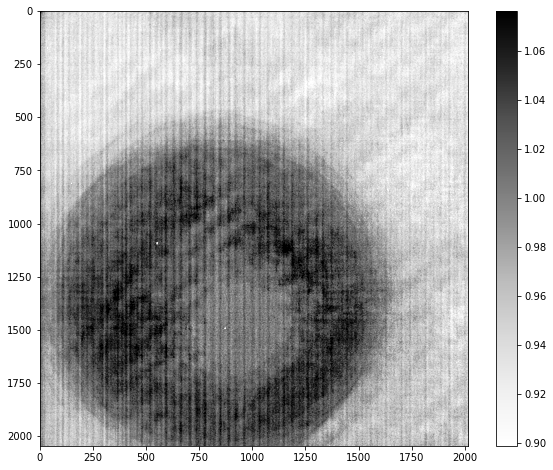

In [429]:
skyflat3 = ccdp.combine(masked_images,method='median', scale=inv_median,
                           sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=1.,
                           sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,unit=u.electron)
display(skyflat3)

In [431]:
h = fits.getheader(a1[0])

In [432]:
h

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2014 / length of data axis 1                          
NAXIS2  =                 2046 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FILTER  = 'Ha4nm'                                                               
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'        

In [441]:
from astropy.coordinates import SkyCoord
from astropy.table import Table

In [435]:
center = SkyCoord(h['CRVAL1'],h['CRVAL2'],frame='icrs',unit='deg')

In [436]:
center

<SkyCoord (ICRS): (ra, dec) in deg
    (223.2585531, 59.15724229)>

In [442]:
brightstar = Table.read('/home/rfinn/research/legacy/gaia-mask-dr10-mag-lt-12.fits')

In [446]:
starcoord = SkyCoord(brightstar['ra'],brightstar['dec'],frame='icrs',unit='deg')

In [449]:
t = center.separation(starcoord)

In [451]:
flag = t.degree < 0.25

In [454]:
np.sum(flag)

0

In [ ]:
%time %run ~/github/HalphaImaging/python3/BOK_03_sky_flat.py Ha4nm

In [494]:
a1 = np.array(a1)

In [ ]:
list(a1[~bright_star_flag])

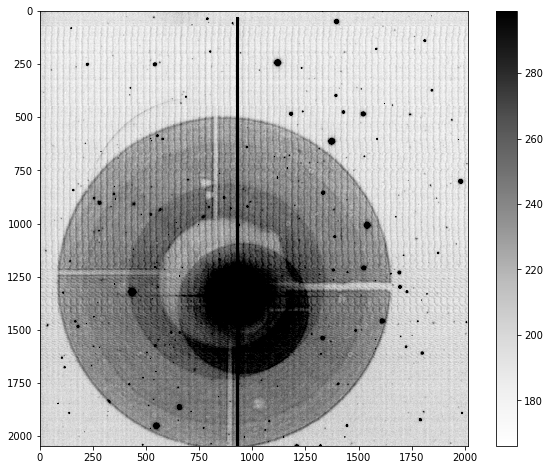

In [464]:
d,h = fits.getdata(a1[0],header=True)
display(d)

In [465]:
center = SkyCoord(h['CRVAL1'],h['CRVAL2'],frame='icrs',unit='deg')

In [484]:
brightstar = Table.read('/home/rfinn/research/legacy/gaia-mask-dr9-bright-Virgo.fits')
starcoord = SkyCoord(brightstar['ra'],brightstar['dec'],frame='icrs',unit='deg')

In [485]:
dist = center.separation(starcoord)

In [500]:
brightstar[dist.deg < 0.25]

<Table length=20>
        ra                dec         ... gaia_astrometric_params_solved
       deg                deg         ...                               
     float64            float64       ...             uint8             
------------------ ------------------ ... ------------------------------
 223.1303253739952  59.31780331201497 ...                              0
 222.8591234054671  59.29457763657896 ...                             31
222.84865355226668  59.15093112268329 ...                             31
223.20505808449911 59.258488063290834 ...                             31
223.00717583451095  59.12820324530071 ...                             31
222.86254605052935  59.23238032302729 ...                             31
 223.0393153709592 59.350217029451564 ...                             31
222.83552543378036 59.163593217526824 ...                             31
223.49453813284535 59.216554047390225 ...                             31
 223.3524026090749  59.30344407536885 ...                             31
 223.5572647774466  59.33823881799853 ...                             31
223.59378177925515 59.203592421642995 ...                             31
223.58154674049135  59.17325910228837 ...                             31
 223.1558096992293 59.051069545348206 ...                             31
 223.1544165888162  59.05060454742648 ...                             31
223.11093534571842  59.09401078178614 ...                             31
223.39674792727277  58.92474990273966 ...                             31
223.01547627956538  58.96885291759705 ...                             31
223.55801860182135  59.00375669218474 ...                             31
223.60950133749418  59.10198759528194 ...                             31

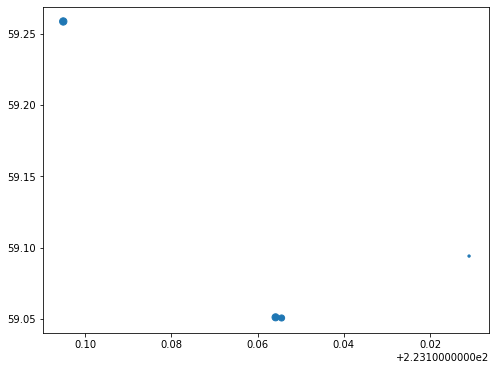

In [513]:
plt.figure(figsize=(8,6))
tab = brightstar[dist.deg < 0.12]
plt.scatter(tab['ra'],tab['dec'],s=(12-tab['mag'])*20)
plt.gca().invert_xaxis()

In [482]:
np.sum( (starcoord.dec.deg > 59) & (starcoord.dec.deg < 59.5))

0

In [514]:
center

<SkyCoord (ICRS): (ra, dec) in deg
    (223.2585531, 59.15724229)>

In [520]:
racenter = h['CRVAL1'] + (h['NAXIS1']/2 - h['CRPIX1'])*h['CD1_1']

In [521]:
racenter

223.26012029414744

In [519]:
h['CRVAL1']

223.2585531

In [522]:
from astropy.wcs import WCS

In [523]:
w = WCS(h)

In [524]:
x,y = w.world_to_pixel(starcoord)

In [525]:
flag = (x > 0) & (x < h['NAXIS1']) & (y>0) & (y < h['NAXIS2'])

In [526]:
np.sum(flag)

6

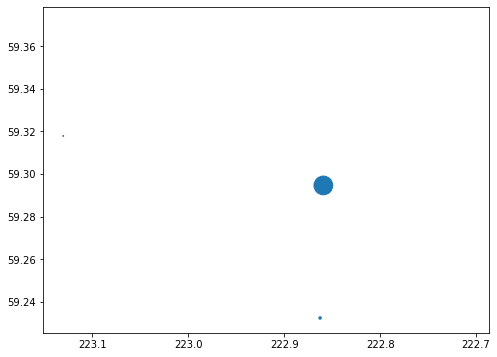

In [528]:
plt.figure(figsize=(8,6))

plt.scatter(brightstar['ra'][flag],brightstar['dec'][flag],s=(12-brightstar['mag'][flag])*50)
plt.gca().invert_xaxis()

In [530]:
%time %run ~/github/HalphaImaging/python3/BOK_03_sky_flat.py Ha4nm

looking for bright stars...
removing 0 images due to bright stars

processing 30 images for amp 1 skyflat
getting object masks
combining
looking for bright stars...
removing 10 images due to bright stars

processing 20 images for amp 2 skyflat
getting object masks
combining
looking for bright stars...
removing 10 images due to bright stars

processing 20 images for amp 3 skyflat
getting object masks
combining
looking for bright stars...
removing 0 images due to bright stars

processing 30 images for amp 4 skyflat
getting object masks
combining
looking for bright stars...
removing 0 images due to bright stars

processing 30 images for amp 5 skyflat
getting object masks
combining
looking for bright stars...
removing 0 images due to bright stars

processing 30 images for amp 6 skyflat
getting object masks
combining
looking for bright stars...
removing 0 images due to bright stars

processing 30 images for amp 7 skyflat
getting object masks
combining
looking for bright stars...
removing 10

Process ForkPoolWorker-627:
Process ForkPoolWorker-636:
Process ForkPoolWorker-632:
Process ForkPoolWorker-631:
Process ForkPoolWorker-630:
Process ForkPoolWorker-633:
Process ForkPoolWorker-626:
Process ForkPoolWorker-625:
Process ForkPoolWorker-629:
Traceback (most recent call last):
Process ForkPoolWorker-628:
Process ForkPoolWorker-634:
Process ForkPoolWorker-635:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/rfinn/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/rfinn/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rfinn/anaconda3/lib/python3.7/multiproces

KeyboardInterrupt: 

CPU times: user 1h 1min 25s, sys: 48.9 s, total: 1h 2min 14s
Wall time: 36min 39s


In [531]:
a1

['/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:05:50.686_9PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:50:52.652_9PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:58:21.557_9PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:20:49.076_9PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:09:35.057_9PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:17:04.648_9PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:13:19.908_9PA.fits',
 '/media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:02:06.325_9PA

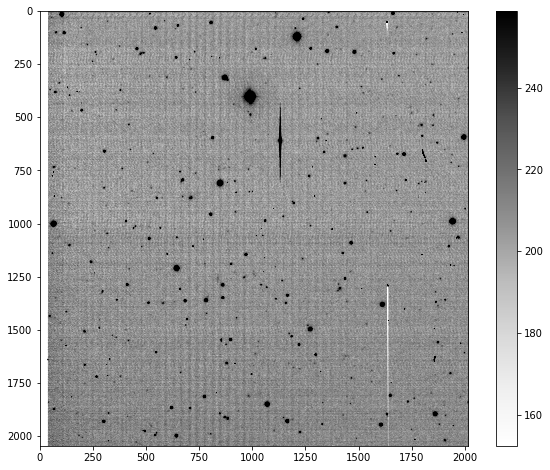

In [536]:
d,h = fits.getdata(a1[-1],header=True)
display(d)

In [534]:
len(this_median)


28

In [537]:
amp[8:9]

array([9])

In [540]:
i =1
for f in filelist: 
    if '8P' in f:
        print(i,f)
        i += 1

1 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:02:06.325_8PA.fits
2 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:54:37.261_8PA.fits
3 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:50:52.652_8PA.fits
4 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:09:35.057_8PA.fits
5 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:17:04.648_8PA.fits
6 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:13:19.908_8PA.fits
7 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T09:05:50.686_8PA.fits
8 /media/rfinn/hdata/BOK2022Apr/gain_cor_no_bias_cor/20220423/target-Ha4nm_0/90Prime.Ha4nm.2022-04-23T08:47:07.896_8PA.fits
9 /media

In [541]:
%time %run ~/github/HalphaImaging/python3/BOK_03_sky_flat.py Ha4nm

#################################
working on amp 10
looking for bright stars...
removing 10 images due to bright stars

processing 20 images for amp 10 skyflat
getting object masks
combining
CPU times: user 6min 1s, sys: 11 s, total: 6min 12s
Wall time: 3min 26s


<Figure size 432x288 with 0 Axes>

# Comparing photometric zeropoints from NOAO pipeline and my post-processing + getzp.py

agreement is not great, but I have scaled the images a few times,so that is not surprising.

In [547]:
from astropy.table import Table

In [551]:
rtab = Table.read('/home/rfinn/research/Virgo/bokpipeline-zp-comparison/r-zp-comparison.txt',format='ascii')

htab = Table.read('/home/rfinn/research/Virgo/bokpipeline-zp-comparison/Ha4-zp-comparison.txt',format='ascii')

In [561]:
rdate = []
for n in rtab['col1']:
    t = n.split('-')
    rdate.append(int(t[1]))
    
hdate = []
for n in htab['col1']:
    t = n.split('-')
    hdate.append(int(t[1]))

In [549]:
rtab

<Table length=33>
              col1                 col2    col3 
             str32               float64 float64
-------------------------------- ------- -------
nVF-20210315-BOK-VFID0501-r.fits  20.267  20.184
nVF-20210315-BOK-VFID1538-r.fits  20.359  20.226
nVF-20210315-BOK-VFID1573-r.fits  20.208  20.219
nVF-20210315-BOK-VFID1728-r.fits  20.326  20.283
nVF-20210315-BOK-VFID2303-r.fits   20.23   20.29
nVF-20210315-BOK-VFID2357-r.fits   20.39  20.289
nVF-20210315-BOK-VFID2593-r.fits  20.307  20.301
nVF-20210315-BOK-VFID2821-r.fits  20.352  20.282
nVF-20210316-BOK-VFID3299-r.fits  20.367  20.339
nVF-20210414-BOK-VFID0422-r.fits  20.361  20.251
                             ...     ...     ...
nVF-20210417-BOK-VFID4894-r.fits  20.391  20.333
nVF-20210417-BOK-VFID6253-r.fits  20.379  20.325
nVF-20210418-BOK-VFID0788-r.fits  20.337  20.217
nVF-20210418-BOK-VFID1821-r.fits   20.34  20.237
nVF-20210418-BOK-VFID2621-r.fits  20.365  20.221
nVF-20210418-BOK-VFID2704-r.fits  20.338  20.277
nVF-20210418-BOK-VFID3459-r.fits  20.346  20.286
nVF-20210418-BOK-VFID4796-r.fits  20.336  20.354
nVF-20210418-BOK-VFID5695-r.fits  20.332  20.285
nVF-20210418-BOK-VFID6406-r.fits  20.295   20.29

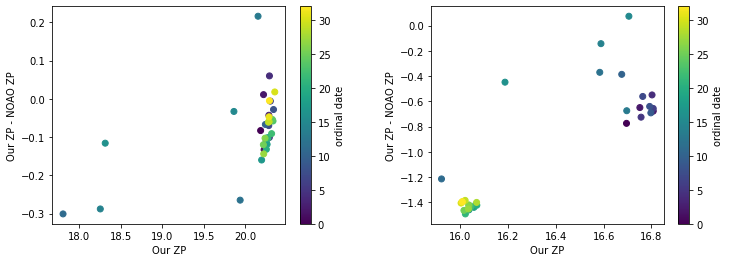

In [569]:
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=.3)
plt.subplot(1,2,1)
plt.scatter(rtab['col3'],rtab['col3']-rtab['col2'],c=np.arange(len(rtab)))
plt.xlabel("Our ZP")
plt.ylabel("Our ZP after processing (PHOTZP)")
plt.ylabel("Our ZP - NOAO ZP")
plt.colorbar(label='ordinal date')

plt.subplot(1,2,2)
plt.scatter(htab['col3'],htab['col3']-htab['col2'],c=np.arange(len(htab)))
plt.xlabel("Our ZP")
plt.ylabel("Our ZP - NOAO ZP")
plt.colorbar(label='ordinal date')

# 2023-May-26

* Need to check out difference in positions b/w r and Halpha images.
* seems like there is a difference in pixel size, or different WCS

In [53]:
# pick an image to read catalogs for
import os
import glob
import numpy as np
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib import pyplot as plt

In [2]:
os.chdir('/media/rfinn/hdata/coadds/bok-wcs-test/')

In [4]:
ffiles = os.listdir()

In [6]:
ffiles.sort()

In [7]:
ffiles

['VF-126.652+28.234-BOK-20210417-VFID3106-Ha4.cat',
 'VF-126.652+28.234-BOK-20210417-VFID3106-r.cat',
 'VF-135.196+45.266-BOK-20210315-VFID1728-Ha4.cat',
 'VF-135.196+45.266-BOK-20210315-VFID1728-r.cat',
 'VF-139.836+25.869-BOK-20210316-VFID3299-Ha4.cat',
 'VF-139.836+25.869-BOK-20210316-VFID3299-r.cat',
 'VF-153.444+43.506-BOK-20210416-VFID1844-Ha4.cat',
 'VF-153.444+43.506-BOK-20210416-VFID1844-r.cat',
 'VF-159.294+37.779-BOK-20210315-VFID2303-Ha4.cat',
 'VF-159.294+37.779-BOK-20210315-VFID2303-r.cat',
 'VF-163.535+34.124-BOK-20210315-VFID2593-Ha4.cat',
 'VF-163.535+34.124-BOK-20210315-VFID2593-r.cat',
 'VF-169.058+47.938-BOK-20210315-VFID1538-Ha4.cat',
 'VF-169.058+47.938-BOK-20210315-VFID1538-r.cat',
 'VF-172.248+29.701-BOK-20210414-VFID2947-Ha4.cat',
 'VF-172.248+29.701-BOK-20210414-VFID2947-r.cat',
 'VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.cat',
 'VF-172.650+35.671-BOK-20210417-VFID2484-r.cat',
 'VF-173.196+36.971-BOK-20210315-VFID2357-Ha4.cat',
 'VF-173.196+36.971-BOK-202103

In [20]:
rcats = []
hcats = []
for i in np.arange(0,len(ffiles),2):
    hcats.append(ffiles[i])
    rcats.append(ffiles[i+1])

In [24]:

for i in range(1):
    # read in cats
    rtab = Table.read(rcats[i],2)
    htab = Table.read(hcats[i],2)
    rcoord = SkyCoord(rtab['X_IMAGE'],rtab['Y_IMAGE'], units=u.pixel)
    break

In [125]:
rcoord = SkyCoord(rtab['ALPHA_J2000'],rtab['DELTA_J2000'],unit=u.deg)
hcoord = SkyCoord(htab['ALPHA_J2000'],htab['DELTA_J2000'],unit=u.deg)

In [126]:
# idx is index in hcoor
idx, d2d,d3d = rcoord.match_to_catalog_sky(hcoord)

In [127]:
matchflag = (d2d < 2.*u.arcsec) & (rtab['CLASS_STAR']> 0.95)

In [79]:
#
rindex = np.arange(len(rcoord))[matchflag]
hindex = idx[matchflag]

In [80]:
distance = np.sqrt((rtab['X_IMAGE'][rindex]-htab['X_IMAGE'][hindex])**2 + (rtab['Y_IMAGE'][rindex]-htab['Y_IMAGE'][hindex])**2)

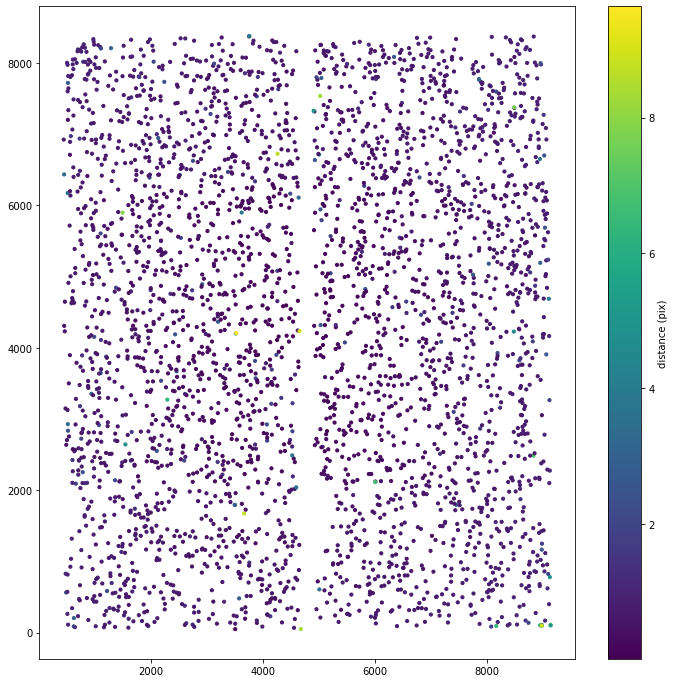

In [81]:
plt.figure(figsize=(12,12))
plt.scatter(rtab['X_IMAGE'][rindex], rtab['Y_IMAGE'][rindex], c=distance,s=10)
plt.colorbar(label='distance (pix)')

(-10.0, 5.0)

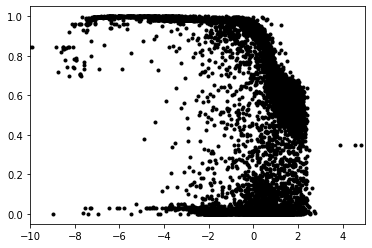

In [73]:
plt.plot(rtab['MAG_ISO'], rtab['CLASS_STAR'],'k.')
plt.xlim(-10,5)

In [93]:
rflag = (rtab['CLASS_STAR']> 0.98)
hflag = (htab['CLASS_STAR']> 0.98)
#
rindex = np.arange(len(rcoord))[matchflag & rflag]
hindex = idx[matchflag & rflag]

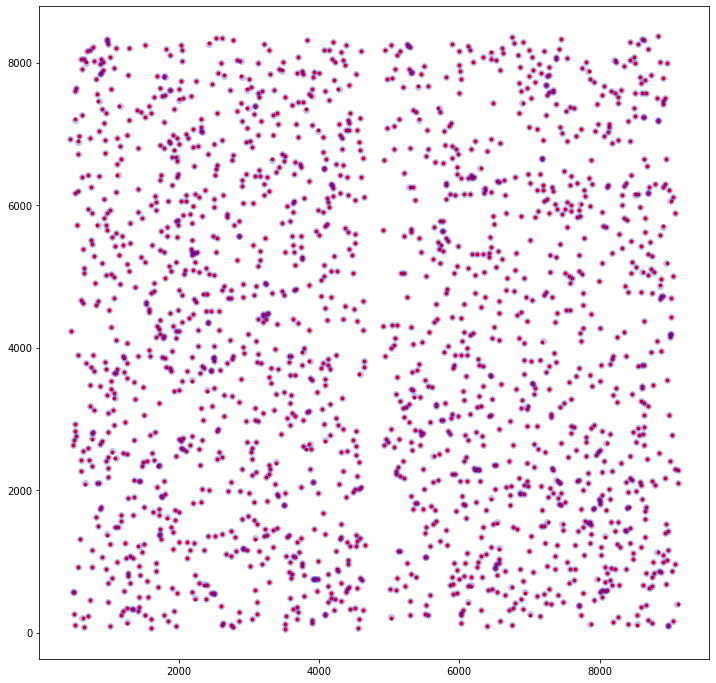

In [94]:
plt.figure(figsize=(12,12))
plt.plot(rtab['X_IMAGE'][rindex],rtab['Y_IMAGE'][rindex],'r.')
plt.plot(htab['X_IMAGE'][hindex],htab['Y_IMAGE'][hindex],'bo',alpha=.2)

Text(0.5, 1.0, 'Offset b/w r and H-alpha Positions in arcsec')

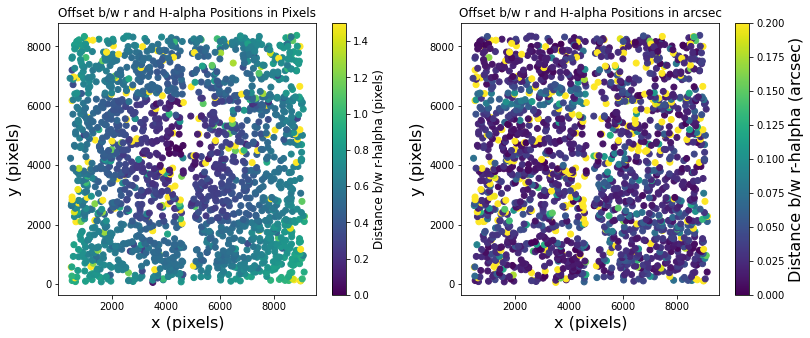

In [132]:
distance = np.sqrt((rtab['X_IMAGE'][rindex]-htab['X_IMAGE'][hindex])**2 + (rtab['Y_IMAGE'][rindex]-htab['Y_IMAGE'][hindex])**2)


plt.figure(figsize=(13,5))
plt.subplots_adjust(wspace=.25)
plt.subplot(1,2,1)
plt.scatter(rtab['X_IMAGE'][rindex],rtab['Y_IMAGE'][rindex],c=distance,vmin=0,vmax=1.5)
cb = plt.colorbar()
cb.set_label(label='Distance b/w r-halpha (pixels)',fontsize=12)
#plt.plot(htab['X_IMAGE'][hindex],htab['Y_IMAGE'][hindex],'bo',alpha=.2)
plt.xlabel('x (pixels)',fontsize=16)
plt.ylabel('y (pixels)',fontsize=16)
plt.title("Offset b/w r and H-alpha Positions in Pixels")

plt.subplot(1,2,2)

distance = np.sqrt((rtab['ALPHA_J2000'][rindex]-htab['ALPHA_J2000'][hindex])**2 + (rtab['DELTA_J2000'][rindex]-htab['DELTA_J2000'][hindex])**2)
distance = distance*3600 # convert from deg to arcsec

plt.scatter(rtab['X_IMAGE'][rindex],rtab['Y_IMAGE'][rindex],c=distance,vmin=0,vmax=.2)
cb = plt.colorbar()
cb.set_label(label='Distance b/w r-halpha (arcsec)',fontsize=16)
#plt.plot(htab['X_IMAGE'][hindex],htab['Y_IMAGE'][hindex],'bo',alpha=.2)
plt.xlabel('x (pixels)',fontsize=16)
plt.ylabel('y (pixels)',fontsize=16)
plt.title("Offset b/w r and H-alpha Positions in arcsec")

In [129]:
rtab['ALPHA_J2000']

<Column name='ALPHA_J2000' dtype='float64' unit='deg' format='{:11.7f}' length=10987>
126.0615677
126.9670316
126.8135581
126.6647348
126.6950459
127.2252597
127.1156790
126.6394543
126.0279097
127.0615689
126.9138601
126.9300533
        ...
126.2654790
126.6994882
126.9335675
127.0611679
127.0480501
126.8397535
127.1122326
126.4623677
126.9739489
127.0764559
126.9236478
126.9344379

# Fix Amp Offsets Failing for some Halpha images

found out that the zp adjustment failed for a bunch of the 2022 Halpha images.  Need to figure out what is going wrong.  Added back in code to look for existing image, so it doesn't go through zp calibration again for the ones that worked.
Example VFID3948_Ha4nm has only 1 image
zmksb_220424_091458_ooi_Ha4nm_v1.fits

but this should contain

```
ksb_220424_084501_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0159.fits
ksb_220424_084846_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0160.fits
ksb_220424_085230_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0161.fits
ksb_220424_085615_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0162.fits
ksb_220424_090000_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0163.fits
ksb_220424_090344_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0164.fits
ksb_220424_090728_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0165.fits
ksb_220424_091113_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0166.fits
ksb_220424_091458_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0167.fits
ksb_220424_091843_ooi_Ha4nm_v1.fits VFID3948_Ha4nm ut20220424.0168.fits
```

testing one image


ksb_220424_084501_ooi_Ha4nm_v1.fits

```
python ~/github/HalphaImaging/python3/BOK_pipeline_fixampoffsets.py ksb_220424_084501_ooi_Ha4nm_v1.fits
```

Copying ksb and mksb images to laptop for testing

/media/rfinn/hdata/test-bok2022-getzp-failing-ha-images


median-subtracted image looks ok.

problem is that all the points are rejected when fitting ZP for ccd 4 - that odd.



In [1]:
import os
from matplotlib import pyplot as plt
from astropy.table import Table

In [2]:
os.chdir('/media/rfinn/hdata/test-bok2022-getzp-failing-ha-images')

In [3]:
!ls

background.fits
check.fits
default.conv
default.nnw
default.param
default.scamp
default.scamp.INT
default.scamp.old
default.scamp.v2
default.sex.HDI
default.sex.HDI.mask
default.sex.INT
default.sex.param
default.sex.sdss
default.sex.siena
default.swarp
default.swarp.bok
default.swarp.BOK
default.swarp.BOK~
default.swarp.HDI
default.swarp.INT
default.swarp.INT.scampallatonce
getzp-fig2.png
ksb_220424_084501_ood_Ha4nm_v1.fits
ksb_220424_084501_ooi_Ha4nm_v1.fits
ksb_220424_084501_ooi_Ha4nm_v1-temp1.fits
ksb_220424_084501_ooi_Ha4nm_v1-temp2.fits
ksb_220424_084501_ooi_Ha4nm_v1-temp3.fits
ksb_220424_084501_ooi_Ha4nm_v1-temp4.fits
ksb_220424_084501_oow_Ha4nm_v1.fits
mksb_220424_084501_ooi_Ha4nm_v1.fits
nksb_220424_084501_ooi_Ha4nm_v1-temp1.cat
nksb_220424_084501_ooi_Ha4nm_v1-temp1.fits
nksb_220424_084501_ooi_Ha4nm_v1-temp1.fits_pan_tab.csv
nksb_220424_084501_ooi_Ha4nm_v1-temp2.cat
nksb_220424_084501_ooi_Ha4nm_v1-temp2.fits
nksb_220424_084501_ooi_Ha4nm_v1-temp2.fits_pan_tab.csv
nksb_220424_084

In [5]:
# going to run getzp on ccd 4 to see what is happening


%run ~/github/HalphaImaging/python3/getzp.py --help

usage: getzp.py [-h] [--image IMAGE] [--instrument INSTRUMENT]
                [--catalog CATALOG] [--fwhm FWHM] [--filter FILTER] [--useri]
                [--normbyexptime] [--mag {0,1,2}] [--naper NAPER]
                [--nsigma NSIGMA] [--d D] [--fit] [--flatten {0,1,2}]
                [--norder {0,1,2}] [--verbose] [--getrefcatonly] [--nofixbok]

Run sextractor, get Pan-STARRS catalog, and then computer photometric ZP
 
 from within ipython: 
 %run ~/github/Virgo/programs/getzp.py --image pointing031-r.coadd.fits --instrument i 
 
 The y intercept is -1*ZP. 
 
 x and y data can be accessed at zp.x and zp.y in case you want to make additional plots.

optional arguments:
  -h, --help            show this help message and exit
  --image IMAGE         Image for ZP calibration
  --instrument INSTRUMENT
                        HDI = h, KPNO mosaic = m, INT = i, BOK 90Prime = b
  --catalog CATALOG     photometric catalog to use for bootrapping photometry
  --fwhm FWHM           image F

found SE cat!!!
panstarrs table already downloaded
correcting color for ha filter at KPNO


/home/rfinn/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


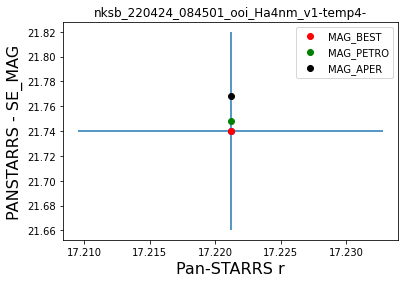

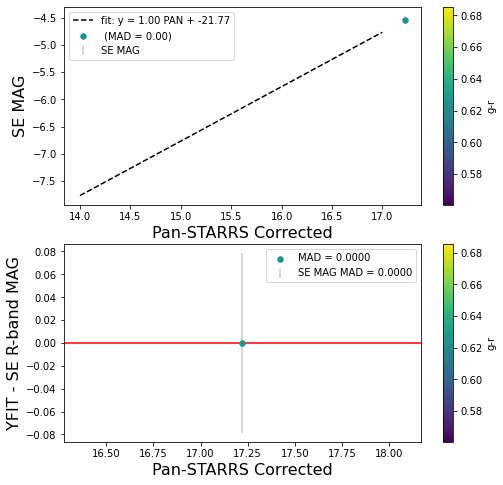

In [6]:

%run ~/github/HalphaImaging/python3/getzp.py --image nksb_220424_084501_ooi_Ha4nm_v1-temp4.fits --instrument b --filter ha

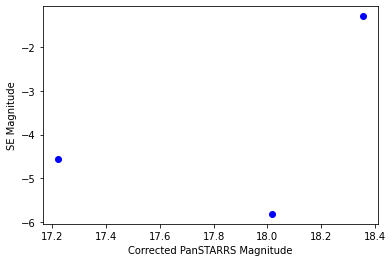

In [7]:
zp.plot_se_pan()

number of matched sources = 3


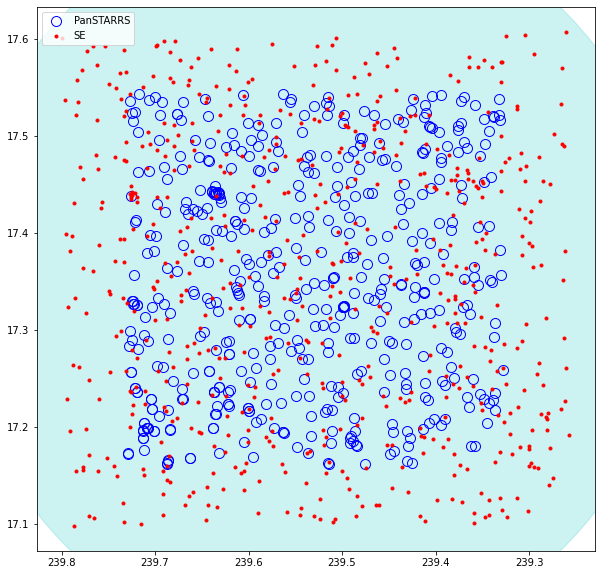

In [21]:
# plot positions of both catalogs

plt.figure(figsize=(10,10))
plt.plot(zp.pan['RAJ2000'],zp.pan['DEJ2000'],'bo',markersize=10,mfc='None',label='PanSTARRS')

plt.plot(zp.secat['ALPHA_J2000'],zp.secat['DELTA_J2000'],'r.',label='SE')
plt.legend()
plt.gca().invert_xaxis()
print(f"number of matched sources = {np.sum(zp.matchflag)}")

# add circle

circle1 = plt.Circle((zp.centerRA, zp.centerDEC), zp.radius, color='c',alpha=.2)
plt.gca().add_patch(circle1)
# radius is working ok, but why are there so few panstarrs points? and why don't they
# match 

Looks like there is not a good match to wcs?

found SE cat!!!
panstarrs table already downloaded
correcting color for ha filter at KPNO


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


checking 90prime ccds... False
	median and scale for quadrant 1 = 1.645 0.770
	median and scale for quadrant 2 = nan nan
	median and scale for quadrant 3 = nan nan
	median and scale for quadrant 4 = 0.887 1.427


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5188: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


ZP = 16.350 +/- 0.000, nksb_220424_084501_ooi_Ha4nm_v1-temp1.fits


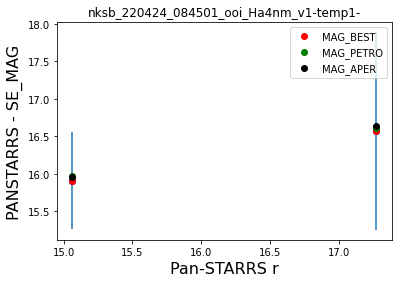

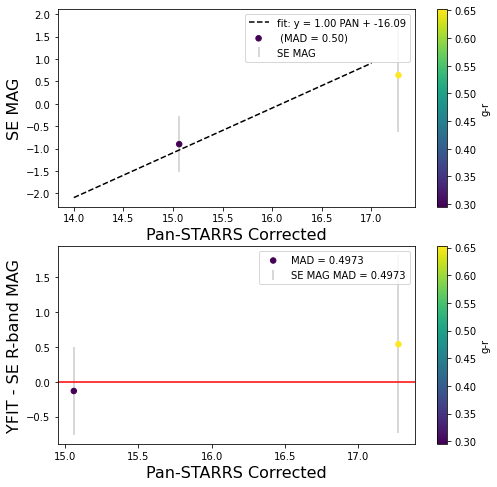

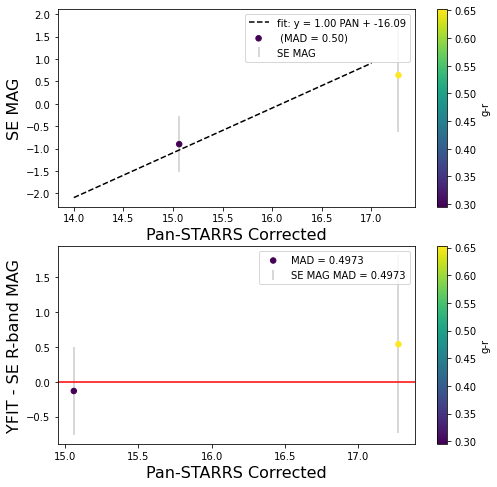

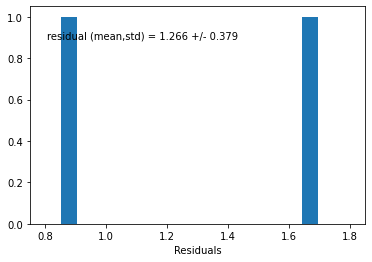

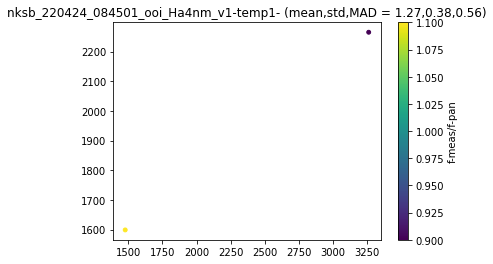

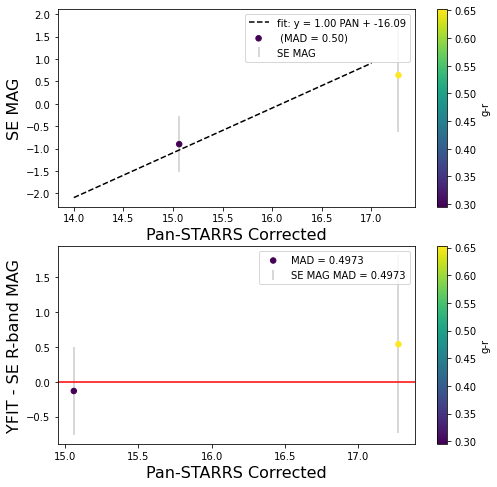

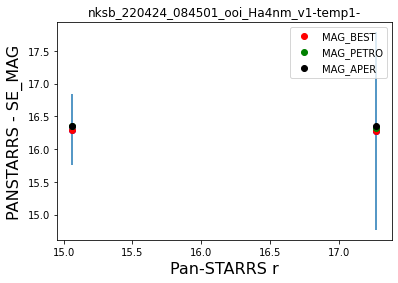

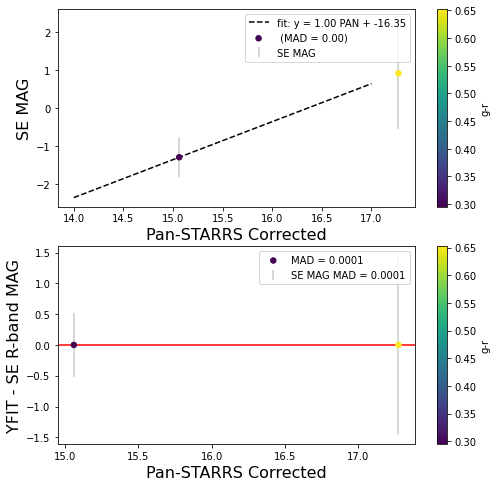

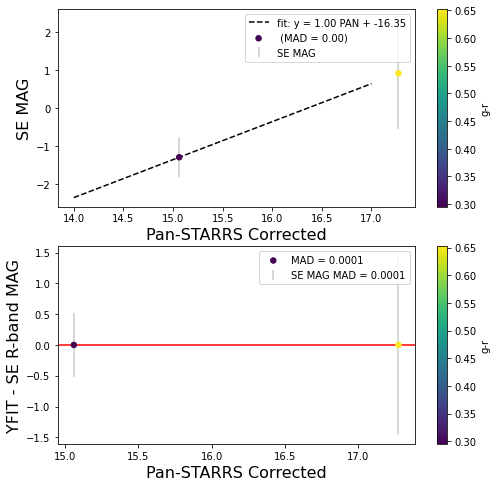

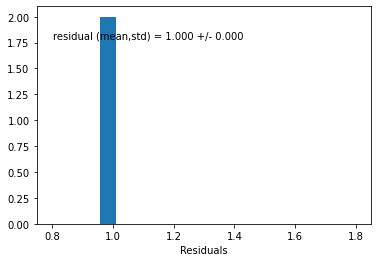

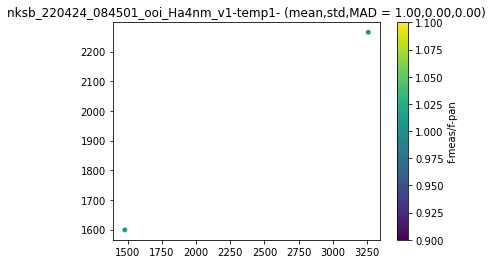

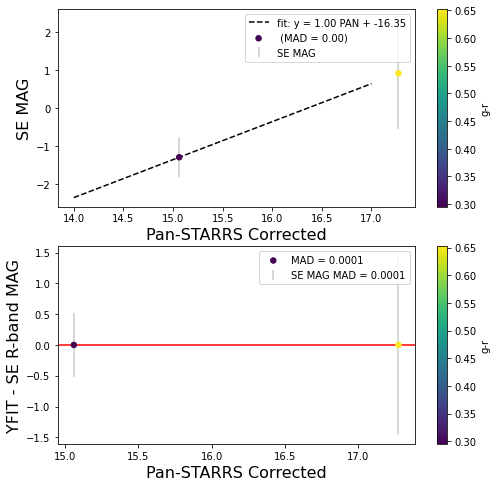

In [25]:
# testing on ccd 1
%run ~/github/HalphaImaging/python3/getzp.py --image nksb_220424_084501_ooi_Ha4nm_v1-temp1.fits --instrument b --filter ha

number of matched sources = 4


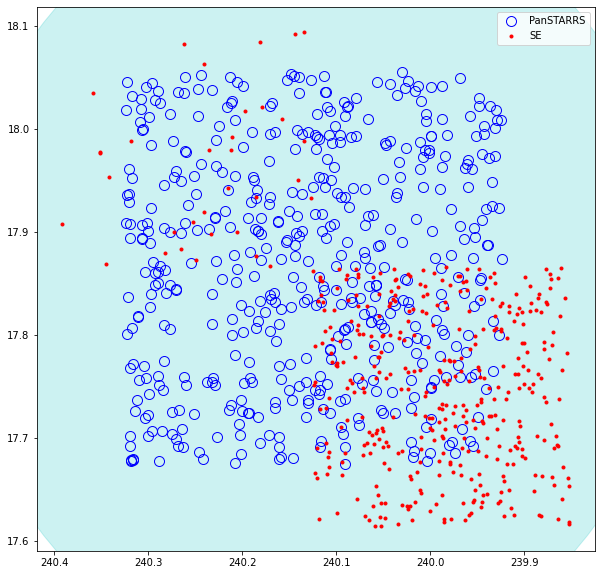

In [26]:
# plot positions of both catalogs

plt.figure(figsize=(10,10))
plt.plot(zp.pan['RAJ2000'],zp.pan['DEJ2000'],'bo',markersize=10,mfc='None',label='PanSTARRS')

plt.plot(zp.secat['ALPHA_J2000'],zp.secat['DELTA_J2000'],'r.',label='SE')
plt.legend()
plt.gca().invert_xaxis()
print(f"number of matched sources = {np.sum(zp.matchflag)}")

# add circle

circle1 = plt.Circle((zp.centerRA, zp.centerDEC), zp.radius, color='c',alpha=.2)
plt.gca().add_patch(circle1)
# radius is working ok, but why are there so few panstarrs points? and why don't they
# match 

wtf is happening?

this is working fine for 2/3 of halpha images, but then these are wacked out.

will pick this up on monday - need to figure out what is wrong.